In [1]:
import os
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Dense, Activation,BatchNormalization,Permute,Flatten,Masking,GaussianNoise,Reshape, Lambda,TimeDistributed,Dropout
from tensorflow.keras.layers import add, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, MaxPool2D
from tensorflow.keras.models import load_model
import  cv2
import numpy as np

from tensorflow.keras.models import save_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU,LSTM
from tensorflow.keras.optimizers import SGD
from PIL import Image
from tensorflow.keras.preprocessing import sequence
import  glob,cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import  load_model

Using TensorFlow backend.


In [2]:
img_row = 32
img_col = 200
rnn_size = 256
act= 'relu'

In [3]:
path1 = '/media/nbm/2D08-2980/ICT4D/Historical_code/dataset_his/*'  # path of folder of images and texts
# path2 = '/home/belay/english_word'
imagepath = sorted(glob.glob(path1 + '/*/*.bin.png'))
#textpath = sorted(glob.glob(path1 + '/*/*.bin.txt'))


In [4]:
len(imagepath)

79728

In [5]:
len(textpath)

79728

In [6]:
# out = open("/media/nbm/2D08-2980/ICT4D/Historical_code/dataset_his/text-file_missed.txt", "w")

# for i in textpath:
#     with open(i) as f:
#         for line in f:
            
#             #if len(line)=='' or line==" " or line==' ':continue
#             out.write(line +'\n')


# out.close()

In [249]:
#to map charcters with some unich integer val
text = open("/media/nbm/2D08-2980/ICT4D/Historical_code/dataset_his/text-file.txt", 'r').read()#.decode('utf-8')  # strip use to remove the last \n line
chars = sorted(list(set(text)))
mapping = dict((c, i) for i, c in enumerate(chars))  # map charcter to index
mapping1 = dict((i, c) for i, c in enumerate(chars))  # mapp index to character

In [250]:
mapping

{'\n': 0,
 ' ': 1,
 '"': 2,
 "'": 3,
 ',': 4,
 '-': 5,
 '.': 6,
 '/': 7,
 '0': 8,
 '1': 9,
 '2': 10,
 '3': 11,
 '4': 12,
 '5': 13,
 '6': 14,
 '7': 15,
 '8': 16,
 '9': 17,
 ':': 18,
 '<': 19,
 '=': 20,
 '>': 21,
 '?': 22,
 'C': 23,
 'E': 24,
 'H': 25,
 'I': 26,
 'L': 27,
 'M': 28,
 'P': 29,
 'R': 30,
 'W': 31,
 '\\': 32,
 '_': 33,
 'a': 34,
 'b': 35,
 'c': 36,
 'd': 37,
 'e': 38,
 'g': 39,
 'h': 40,
 'i': 41,
 'j': 42,
 'm': 43,
 'n': 44,
 'o': 45,
 'p': 46,
 'r': 47,
 's': 48,
 't': 49,
 'u': 50,
 'w': 51,
 'y': 52,
 '{': 53,
 '|': 54,
 'ሀ': 55,
 'ሁ': 56,
 'ሂ': 57,
 'ሃ': 58,
 'ሄ': 59,
 'ህ': 60,
 'ሆ': 61,
 'ለ': 62,
 'ሉ': 63,
 'ሊ': 64,
 'ላ': 65,
 'ሌ': 66,
 'ል': 67,
 'ሎ': 68,
 'ሏ': 69,
 'ሐ': 70,
 'ሑ': 71,
 'ሒ': 72,
 'ሓ': 73,
 'ሔ': 74,
 'ሕ': 75,
 'ሖ': 76,
 'መ': 77,
 'ሙ': 78,
 'ሚ': 79,
 'ማ': 80,
 'ሜ': 81,
 'ም': 82,
 'ሞ': 83,
 'ሟ': 84,
 'ሠ': 85,
 'ሡ': 86,
 'ሢ': 87,
 'ሣ': 88,
 'ሤ': 89,
 'ሥ': 90,
 'ሦ': 91,
 'ረ': 92,
 'ሩ': 93,
 'ሪ': 94,
 'ራ': 95,
 'ሬ': 96,
 'ር': 97,
 'ሮ': 98,
 'ሯ': 99,
 'ሰ': 10

In [251]:
np.save('mapping',mapping)


In [7]:
 #to find the fequnce of charcters from the whole text file
freqs = {}
with open('/media/nbm/2D08-2980/ICT4D/Historical_code/dataset_his/text-file.txt') as f:
    for line in f:
        for char in line:
            if char in freqs:
                freqs[char] += 1
                
            else:
                freqs[char] = 1

print(freqs)

{'ጫ': 35, 'ወ': 45131, 'ት': 26707, ' ': 107916, 'ይ': 26746, 'ገ': 6740, 'ባ': 4259, 'ል': 17556, 'ሰ': 12437, 'ሐ': 7603, 'ቅ': 7931, '\n': 79728, 'ሠ': 2421, 'ና': 5190, 'ው': 14654, 'እ': 43786, 'ቱ': 7308, 'ን': 33492, 'ሬ': 810, 'ዮ': 2172, 'ሙ': 11378, 'ለ': 24870, 'አ': 35831, 'ር': 24946, 'ክ': 8805, 'ቲ': 4179, 'ነ': 17259, 'ም': 23699, 'ድ': 12674, 'ሳ': 2641, 'ረ': 10062, 'ጉ': 1256, 'ዘ': 14272, 'ብ': 22496, 'ያ': 9595, '፡': 124895, 'ሔ': 4044, ',': 1, 'ዳ': 4154, 'ሉ': 5610, '።': 7640, 'ግ': 13094, 'መ': 27431, 'ኛ': 212, 'ሞ': 2114, 'ዝ': 6126, 'ማ': 8734, 'ሚ': 1986, 'ስ': 32041, 'ኹ': 235, 'ሎ': 5901, 'በ': 30579, 'ተ': 24487, 'ዱ': 1792, 'ቦ': 2157, 'ኢ': 6860, 'ሮ': 2330, 'ካ': 1472, 'ራ': 3540, 'ሱ': 1970, 'ኬ': 115, 'የ': 13296, 'ቻ': 72, 'ደ': 7960, 'ዕ': 11246, 'ቆ': 1472, 'ላ': 5218, 'ታ': 2933, 'ከ': 21499, 'ቀ': 6502, 'ጥ': 2918, 'ቶ': 3016, 'ሩ': 3228, 'ፍ': 6256, 'ሶ': 1537, 'ፈ': 5727, 'ሣ': 1542, 'ሕ': 7204, 'ሁ': 5455, 'ዜ': 981, 'ኖ': 1860, 'ኮ': 2408, 'ዞ': 154, 'ህ': 3415, 'ጭ': 42, 'ቢ': 3081, 'ሆ': 1851, 'ጋ': 1916, 'ጂ': 104, 'ሲ':

In [6]:
#to count he number of words, line and characters
lines = 0
words = 0
characters = 0
with open('/media/nbm/2D08-2980/ICT4D/Historical_code/dataset_his/text-file.txt') as f:
    for line in  f:
        wordslist = line.split()
        lines = lines + 1
        words = words + len(wordslist)
        characters = characters + len(line)
print(lines)
print(words)
print(characters)

79728
178873
1269817


In [9]:
chars

['\n',
 ' ',
 '"',
 "'",
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '<',
 '=',
 '>',
 '?',
 'C',
 'E',
 'H',
 'I',
 'L',
 'M',
 'P',
 'R',
 'W',
 '\\',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'g',
 'h',
 'i',
 'j',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'w',
 'y',
 '{',
 '|',
 'ሀ',
 'ሁ',
 'ሂ',
 'ሃ',
 'ሄ',
 'ህ',
 'ሆ',
 'ለ',
 'ሉ',
 'ሊ',
 'ላ',
 'ሌ',
 'ል',
 'ሎ',
 'ሏ',
 'ሐ',
 'ሑ',
 'ሒ',
 'ሓ',
 'ሔ',
 'ሕ',
 'ሖ',
 'መ',
 'ሙ',
 'ሚ',
 'ማ',
 'ሜ',
 'ም',
 'ሞ',
 'ሟ',
 'ሠ',
 'ሡ',
 'ሢ',
 'ሣ',
 'ሤ',
 'ሥ',
 'ሦ',
 'ረ',
 'ሩ',
 'ሪ',
 'ራ',
 'ሬ',
 'ር',
 'ሮ',
 'ሯ',
 'ሰ',
 'ሱ',
 'ሲ',
 'ሳ',
 'ሴ',
 'ስ',
 'ሶ',
 'ሷ',
 'ሸ',
 'ሹ',
 'ሺ',
 'ሻ',
 'ሼ',
 'ሽ',
 'ሾ',
 'ቀ',
 'ቁ',
 'ቂ',
 'ቃ',
 'ቄ',
 'ቅ',
 'ቆ',
 'ቈ',
 'ቊ',
 'ቋ',
 'ቍ',
 'በ',
 'ቡ',
 'ቢ',
 'ባ',
 'ቤ',
 'ብ',
 'ቦ',
 'ቧ',
 'ቨ',
 'ቭ',
 'ተ',
 'ቱ',
 'ቲ',
 'ታ',
 'ቴ',
 'ት',
 'ቶ',
 'ቷ',
 'ቸ',
 'ቹ',
 'ቺ',
 'ቻ',
 'ቼ',
 'ች',
 'ቿ',
 'ኀ',
 'ኁ',
 'ኂ',
 'ኃ',
 'ኄ',
 'ኅ',
 'ኆ',
 'ኈ',
 'ኊ',
 'ኋ',
 'ኍ',
 'ነ',
 'ኑ',
 'ኒ',
 'ና',
 '

In [9]:
#mapping charcters to index
sequences = list()
with open('/media/nbm/2D08-2980/ICT4D/Historical_code/dataset_his/text-file.txt') as f:
    for line in f:
        # integer encode line
        if len(line)==0: continue
        encoded_seq = [mapping[char] for char in line]
        # store
        sequences.append(encoded_seq)
label_1 = [list(line) for line in sequences]
# to change each word in to independent array list that have its own size which depends on the character it contains.
minlen = min((len(r)) for r in sequences) 
#maxlen = max((len(r)) for r in sequences)  # find max length(longest  line in the array of the array in the list
# addopted from: https://machinelearningmastery.com/data-preparation-variable-length-input-sequences-sequence-prediction/
#label = np.asarray([np.pad(r, (0, maxlen - len(r)), 'constant', constant_values=0) for r in label_1])
# i just trancat text-lines whose length in above 40 while still padding zero on the texts beklo 40 since
# we only have 179 textlines with length above 40
label=pad_sequences(label_1, maxlen=40, padding='post',truncating="post", value=0.0)
maxlen=40

In [10]:
maxlen

40

In [11]:
label_1[:3]

[[276, 203, 141, 1, 237, 254, 129, 67, 1, 203, 100, 70, 120, 100, 0],
 [85, 165, 237, 1, 208, 182, 137, 1, 167, 96, 182, 238, 0],
 [78, 1, 62, 177, 97, 190, 138, 162, 1, 182, 82, 244, 103, 92, 1, 255, 0]]

In [168]:
tex_char = list()
with open('/media/nbm/2D08-2980/ICT4D/Historical_code/dataset_his/text-file.txt') as f:
    for line in f:
        # integer encode line
        if len(line)==0: continue
        encoded_seq = [char for char in line]
        # store
        tex_char.append(encoded_seq)
text_char_1 =np.array([list(line) for line in tex_char])

/tmp/ipykernel_115858/3650884520.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  text_char_1 =np.array([list(line) for line in tex_char])


In [171]:
text_char_1[100]

['ኖ',
 ' ',
 'እ',
 'ን',
 'ዳ',
 'ለ',
 '፡',
 ' ',
 'ከ',
 'ድ',
 'ጅ',
 '፡',
 'ቁ',
 ' ',
 ' ',
 '/',
 ' ',
 'እ',
 'ን',
 'ዲ',
 ' ',
 'ያ',
 'ጠ',
 'ፋ',
 ' ',
 'ለ',
 'እ',
 'ሳ',
 'ት',
 '፡',
 'ዘ',
 'ት',
 'ነ',
 '\n']

In [98]:
def im_resize(myimage):
    (ht,wt)=(img_row,img_col)
    (h,w)=myimage.shape
    fw=w/wt
    fh=h/ht
    f=max(fw,fh)
    newsize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1))
    myimage = cv2.resize(myimage, newsize)
    target = np.ones([ht, wt]) * 255
    target[0:newsize[1], 0:newsize[0]] = myimage
    #newimage = target
    newimage = cv2.transpose(target)
    (m, s) = cv2.meanStdDev(newimage)
    m=[0][0]
    s=s[0][0]
    newimage=newimage-m
    newimage=newimage/s if s>0 else newimage
    return newimage

In [14]:
image = [np.array(Image.open(i), 'f') for i in imagepath]

In [14]:
X_train,  X_test, y_train, y_test = train_test_split(im, label, test_size=0.1)

NameError: name 'im' is not defined

In [114]:
X_train_1,  X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [3]:
x_train=np.load('x_train_his.npy')
y_train=np.load('y_train_his.npy')


In [5]:
x_test=np.load('final_x_test.npy')
y_test=np.load('final_y_test.npy')
x_val=np.load('final_x_val.npy')
y_val=np.load('final_y_val.npy')

In [112]:
np.save('y_test_correct',newy)

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [99]:
img = []
for i in image:
    im1=im_resize(i)
    img.append(im1.T)

In [100]:
im=np.array(img)

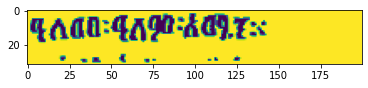

In [17]:
plt.imshow(x_train[11])

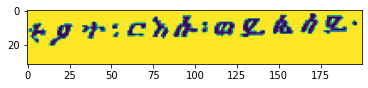

In [102]:
 # to diplay the  sample image with yellow background since it used colormap to map intensity to color.
plt.imshow(im[1])

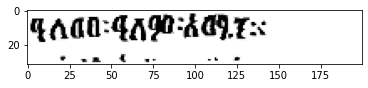

In [18]:
plt.imshow(x_train[11],cmap='Greys_r')# to display the backgrouund to be white


In [ ]:
#np.save('im_dif_dim1',image[:50000])

In [200]:
#x=np.load('im_dif_dim.npy',allow_pickle=True)

In [291]:
y_val.shape

(7181, 40)

In [198]:
len(X_train_1)

64579

In [6]:
#reshape the size of the image from 3D to 4D so as to make the input size is similar with it.
x_train_r=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1) #[samplesize,32,128,1]
x_val_r =x_val.reshape(x_val.shape[0],x_val.shape[1],x_val.shape[2],1)
x_test_r =x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
y_train=y_train
y_test=y_test
y_val=y_val


nb_train = len(x_train_r)
nb_test = len(x_test_r)
nb_val=len(x_val_r)

In [7]:
# we should add a dummy length on the height of the image 
# ( for example: if the image is 32*200 and the  max_len is 47) then
# 2*47-1=93  i.e the input sequence length should be greater than or equal to 93....  then 32+61...
#  61 can be other number greater than itself, however, the sum of 32 and that number 
# should not have greater than the times-step/image  height goes to the LSTM layer.

x_train_len = np.array([len(x_train_r[i])+48 for i in range(nb_train)]) #the +31 here is just to make the size of the image equal to the input of LSTM
x_val_len = np.asarray([len(x_val[i])+48 for i in range(nb_val)])#the +31 here is just to make the size of the image equal to the out put of LSTM
y_train_len = np.array([len(y_train[i]) for i in range(nb_train)])
y_val_len = np.asarray([len(y_val[i]) for i in range(nb_val)])



In [8]:
len(x_train_r[1])

32

In [9]:
inputs_data = Input(shape=(32, 200, 1))
# convolution layer with kernel size (3,3)
conv_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs_data)
# poolig layer with kernel size (2,2)
pool_1 = MaxPool2D(pool_size=(2, 1), strides=2)(conv_1)
conv_2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool_1)
pool_2 = MaxPool2D(pool_size=(2, 1))(conv_2)# we remove the strides here
conv_3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool_2)
conv_4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv_3)
# poolig layer with kernel size (2,1)
pool_3 = MaxPool2D(pool_size=(2, 1))(conv_4)
# Batch normalization layer
batch_norm_5 = BatchNormalization()(pool_3)
conv_5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool_3)

conv_6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv_5)
batch_norm_6 = BatchNormalization()(conv_6)
conv_7 = Conv2D(512, (2, 2), activation='relu')(batch_norm_6)# the output here, called the time step, should be at least greater than the maximum input length of the GT.
#squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)

2022-04-27 11:00:34.441268: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
conv_7.shape

TensorShape([None, 3, 99, 512])

In [11]:
r=Reshape((int(conv_7.shape[2]), int(conv_7.shape[3])*int(conv_7.shape[1])))(conv_7)

In [12]:
r

<KerasTensor: shape=(None, 99, 1536) dtype=float32 (created by layer 'reshape')>

In [13]:
num_class=340
maxlen=40
# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25))(r)
blstm_2 = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25))(blstm_1)
outputs = Dense(num_class + 1, activation='softmax')(blstm_2)

In [16]:
outputs[1][1]

<KerasTensor: shape=(341,) dtype=float32 (created by layer 'tf.__operators__.getitem_2')>

In [13]:
labels = Input(name='the_labels', shape=[maxlen], dtype='float32')# 32 is the max size of text length
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

In [14]:
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args

    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)


loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

In [15]:
#models for predictyion and training
pred_model = Model(inputs=inputs_data,outputs=outputs)
model = Model(inputs=[inputs_data, labels, input_length, label_length], outputs=loss_out)

In [16]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer='adam')

filepath = "his_model.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [17]:
hist=model.fit(x=[x_train, y_train, x_train_len, y_train_len], y=np.zeros(len(y_train)),
              batch_size=32, epochs=30,
              validation_data=([x_val_r, y_val, x_val_len, y_val_len], [np.zeros(len(y_val))]), 
              verbose = 1, callbacks = callbacks_list)

2022-02-23 18:33:06.410559: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-23 18:33:06.441118: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3199980000 Hz


Epoch 1/30
2019/2019 [==============================] - 5064s 3s/step - loss: 76.6084 - val_loss: 80.6135

Epoch 00001: val_loss improved from inf to 80.61346, saving model to his_model.hdf5
Epoch 2/30
2019/2019 [==============================] - 5038s 2s/step - loss: 59.6150 - val_loss: 63.2123

Epoch 00002: val_loss improved from 80.61346 to 63.21230, saving model to his_model.hdf5
Epoch 3/30
2019/2019 [==============================] - 5035s 2s/step - loss: 40.7479 - val_loss: 48.7682

Epoch 00003: val_loss improved from 63.21230 to 48.76822, saving model to his_model.hdf5
Epoch 4/30
2019/2019 [==============================] - 5031s 2s/step - loss: 31.9413 - val_loss: 42.6758

Epoch 00004: val_loss improved from 48.76822 to 42.67582, saving model to his_model.hdf5
Epoch 5/30
2019/2019 [==============================] - 5028s 2s/step - loss: 27.7107 - val_loss: 40.0923

Epoch 00005: val_loss improved from 42.67582 to 40.09233, saving model to his_model.hdf5
Epoch 6/30
2019/2019 [===

In [18]:
#saving and loading model
#-------------------------------------------------------------------------------------------------
pred_model.save('test_model_his_30ep.hdf5')


ValueError: x and y must have same first dimension, but have shapes (1,) and (30,)

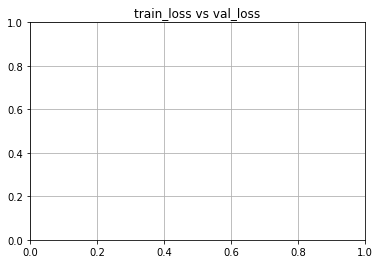

In [20]:
epochs=30
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.plot(epochs, train_loss, 'b--')
plt.plot(epochs, val_loss, 'r--')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

In [22]:
import tensorflow as tf
g= tf.keras.models.load_model(
    'test_model_his_30ep.hdf5',
    custom_objects={'Functional':tf.keras.models.Model})

In [23]:
g.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 200, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 200, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 100, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 128)      73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 100, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 100, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 100, 256)       590080

In [326]:
x_test_r =newx_m.reshape(newx_m.shape[0],newx_m.shape[1],newx_m.shape[2],1)


In [24]:
y_pred=g.predict(x_test_r)
#predmodel=ctc_convolutional_func()
#y_pred=predmodel.predict(X_test)
#print (y_g)

In [36]:

g=pred_model.load_weights('test_model_his.hdf5')


In [25]:
out = K.get_value(K.ctc_decode(y_pred[:, :, :], input_length=np.ones(y_pred.shape[0]) * y_pred.shape[1])[0][0])
#[:,: maxlen]

In [27]:

for i in range(10):
    # print the 10 first predictions
    print("Prediction :", [j for j in out[i] if j != -1], " -- Label : ",  y_test[i])

Prediction : [126, 214, 141, 1, 203, 141, 92, 190, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  -- Label :  [126 214 141   1 203 141  92 190 127   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
Prediction : [167, 105, 1, 90, 97, 259, 208, 315, 126, 286, 65, 1, 167, 315, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  -- Label :  [167 105   1  90  97 259 208 315 126 115 286  65   1 105 167 315 203   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
Prediction : [208, 167, 137, 1, 185, 77, 1, 177, 167, 141, 78, 1, 126, 214, 241, 137, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  -- Label :  [208 167 137   1 185  77   1 182 167 141  78   1 126 167 241 137   0   0
   0   0   0   0   0   

In [28]:
import editdistance


#===========edit distance exampl====================================

#true=['abebe','belay','almaze']
#pred=['abebee','belau','almaaze']
true=[]
# to stor value of character by removing zero which was padded previously and also this 
#is the value of newline in the test label
for i in range(len(y_test)):
    x=[j for j in y_test[i] if j!=0]
    true.append(x)
    
pred=[]
# to stor the pdicted charcter except zerro and -1 which are padded value nad blank space predicted during testing
for i in range(len(out)):
    x=[j for j in out[i] if j not in(0,-1)]
    pred.append(x)

cer=0
for(i,j) in zip(true,pred):
    x=editdistance.eval(i,j)
    cer=cer+x
err=cer
x=0
for i in range(len(true)):
    x=x+len(true[i])
totalchar=x
cerp=(float(err)/totalchar)*100 # to calculate character error rate in percent

In [29]:
cerp

15.970345046907298

In [332]:
y=[]
k=0
for(i,j) in zip(true,pred):
    x=editdistance.eval(i,j)
    if x<=4: 
        y.append(k) 
        #print(k,x)
    k=k+1 


In [333]:
len(y)

5872

In [323]:
#for x
newx_m=[]
for i in y:
    newx_m.append(x_test[i])

newx_m=np.array(newx_m)

In [324]:
#for x
newy_m=[]
for i in y:
    newy_m.append(y_test[i])

newy_m=np.array(newy_m)

In [325]:
newx_m.shape

(6393, 32, 200)

In [264]:
#for x
newx_val=[]
for i in y:
    newx_val.append(x_val[i])

newx_val=np.array(newx_val)

In [283]:
newx_val.shape

(5429, 32, 200)

In [266]:
#for y
newy_val=[]
for i in y:
    newy_val.append(y_val[i])

newy_val=np.array(newy_val)

In [268]:
newy_val.shape

(5429, 40)

In [189]:
len(newx_val)

1747

In [231]:
newy_s=[]
for i in range(len(y_test)):
    if i in y:
        continue
    else:
        n=y_test[i]
    newy_test_final.append(n)

In [232]:
len(newy_test_final)

6221

In [206]:
newx_test_final=[]
for i in range(len(x_test)):
    if i in y:
        continue
    else:
        n=x_test[i]
    newx_test_final.append(n)

In [233]:
len(newx_test_final)

6221

In [284]:
x_im_val=np.append(np.array(newx_m),np.array(newx_val),axis=0)

In [285]:
x_im_val.shape

(7181, 32, 200)

In [286]:
y_tex_val=np.append(np.array(newy_m),np.array(newy_val),axis=0)

In [287]:
y_tex_val.shape

(7181, 40)

In [235]:
np.array(newy_test_final).shape

(6221, 40)

In [288]:
np.save('final_y_val',y_tex_val)
np.save('final_x_val',x_im_val)

In [245]:
xv=np.load('final_x_test.npy')

In [246]:
xv.shape

(7968, 32, 200)

In [241]:
newy_test_final[:2]

[array([126, 214, 141,   1, 203, 141,  92, 190, 127,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0], dtype=int32),
 array([167, 105,   1,  90,  97, 259, 208, 315, 126, 115, 286,  65,   1,
        105, 167, 315, 203,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0], dtype=int32)]

In [145]:
newy_val=[]
for i in range(len(y_test)):
    if i in y:
        n=pred[i]
    else:
        n=true[i]
    newy.append(n)



In [146]:
y_test[4]

array([167, 254,  98, 315, 218, 185,  77, 315,  97, 182, 137, 315, 291,
         1,   1,   1,   1,   1, 126, 182, 259, 223, 182, 141, 162, 315,
       120, 244, 105, 141, 315,   0,   0,   0,   0,   0,   0,   0,   0,
         0], dtype=int32)

In [147]:
newy[4]

[167,
 254,
 98,
 315,
 218,
 185,
 77,
 315,
 97,
 182,
 137,
 315,
 291,
 1,
 1,
 1,
 1,
 1,
 126,
 182,
 259,
 223,
 182,
 141,
 162,
 315,
 120,
 244,
 105,
 141,
 315]

In [140]:
newy

[[62,
  237,
  165,
  259,
  67,
  315,
  182,
  62,
  315,
  55,
  62,
  206,
  315,
  203,
  1,
  1,
  315,
  182,
  223,
  182,
  162,
  315],
 [271, 98, 105, 315, 115, 242, 80, 239, 315, 332, 323, 203],
 [126, 214, 141, 1, 203, 141, 92, 190, 127],
 [167,
  105,
  1,
  90,
  97,
  259,
  208,
  315,
  126,
  115,
  286,
  65,
  1,
  105,
  167,
  315,
  203],
 [167,
  254,
  98,
  315,
  218,
  185,
  77,
  315,
  97,
  182,
  137,
  315,
  291,
  1,
  1,
  1,
  1,
  1,
  126,
  182,
  259,
  223,
  182,
  141,
  162,
  315,
  120,
  244,
  105,
  141,
  315],
 [185,
  165,
  306,
  97,
  232,
  1,
  306,
  86,
  70,
  141,
  1,
  237,
  104,
  131,
  70,
  1,
  62,
  105,
  77,
  185],
 [208, 167, 137, 1, 185, 77, 1, 182, 167, 141, 78, 1, 126, 167, 241, 137],
 [105, 131, 70, 136, 315, 77, 65, 182, 190, 141, 315, 203, 120, 240],
 [203,
  100,
  254,
  244,
  186,
  315,
  68,
  137,
  315,
  131,
  216,
  315,
  232,
  67,
  1,
  182,
  259,
  220,
  177,
  74,
  97,
  62,
  216,
  

In [163]:
yy=np.asarray(np.array([newy]))

/tmp/ipykernel_9507/3316245434.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  yy=np.asarray(np.array([newy]))


In [164]:
yy.shape

(1, 7973)

In [158]:
pred.shape

AttributeError: 'list' object has no attribute 'shape'

In [52]:
x_ref=x.reshape(x.shape[0], x.shape[1], x.shape[2], 1) 

In [53]:
y_pred_ref=g.predict(x_test)

In [54]:
out = K.get_value(K.ctc_decode(y_pred_ref[:, :, :], input_length=np.ones(y_pred_ref.shape[0]) * y_pred_ref.shape[1])[0][0])

In [167]:
import editdistance


#===========edit distance exampl====================================

#true=['abebe','belay','almaze']
#pred=['abebee','belau','almaaze']
true=[]
# to stor value of character by removing zero which was padded previously and also this 
#is the value of newline in the test label
for i in range(len(newy)):
    x=[j for j in newy[i] if j!=0]
    true.append(x)
    
pred=[]
# to stor the pdicted charcter except zerro and -1 which are padded value nad blank space predicted during testing
for i in range(len(out)):
    x=[j for j in out[i] if j not in(0,-1)]
    pred.append(x)

cer=0
for(i,j) in zip(true,pred):
    x=editdistance.eval(i,j)
    cer=cer+x
err=cer
x=0
for i in range(len(true)):
    x=x+len(true[i])
totalchar=x
cerp=(float(err)/totalchar)*100

In [168]:
cerp

17.348693561689508

In [3]:
for intg in true:
    encoded_seq = [mapping1[char] for char in intg]
    print(*encoded_seq)

NameError: name 'true' is not defined

ለ ደ ና ግ ል ፡ እ ለ ፡ ሀ ለ ዋ ፡ ወ       ወ ቦ አ ት ፡ እ ግ ዝ እ ት ነ ፡ ቅ
፡ ይ እ ተ ፡ አ ሚ ረ ፡ ኅ ፡
በ ዓ ት   ወ ት ረ ክ ቡ
ን ስ   ሥ ር ግ ው ፡ በ ቀ ጸ ላ   ስ ን ፡ ወ
ን ገ ሮ ፡ ዘ ከ መ ፡ ር እ ቱ ፡ ጽ           በ እ ግ ዝ እ ት ነ ፡ ቅ ድ ስ ት ፡
ከ ና ፍ ር የ   ፍ ሡ ሐ ት   ይ ሴ ብ ሐ   ለ ስ መ ከ
ው ን ቱ   ከ መ   እ ን ት ሙ   በ ን ዲ ቱ
ስ ብ ሐ ተ ፡ መ ላ እ ክ ት ፡ ወ ቅ ዱ
ወ ሰ ገ ድ ኩ   ሎ ቱ   ብ ሏ ል   ዮ ሐ   እ ግ ዚ አ ብ ሔ ር   ስ ለ ተ ወ ለ ደ
ባ ሕ ፡ በ ም ሕ ረ ት ከ ፡ በ ጽ
አ ፍ ቅ ር   ከ መ
ራ ኢ ል ፡ ወ ይ እ ዚ ኒ ፡ ስ ማ ዕ ፡ ያ
  ዴ ፡ እ ስ መ ፡ ስ ብ ሎ ቱ ፡ ለ እ ግ ዚ አ
ሁ ፡ ኅ ፡ ደ ፡ ረ ዴ ቶ ሙ ፡
የ ም ን ሰ ራ ው ፡ ብ ዙ ፡ በ ጎ   ነ ገ ር
እ ፌ ን ዎ ፡ ኅ ቤ ክ ሙ ፡ ከ መ ፡ ያ ኅ ል ቅ
ቱ   ሰ ማ ዕ ት የ   ወ አ ን
ቶ ፡ ዘ እ ን ዐ ለ ፡ ሰ ቡ ሁ ፡ ባ
ዝ ማ ዲ ሁ   ለ ዝ ኩ   ወ ድ አ   አ ብ ሒ   ስ   ን ስ ዕ ዎ   አ ን ት   ይ ቤ ሎ   እ ን ተ ነ
ቢ ተ   ሞ ቅ ሕ   ፀ ባ ብ   እ ስ ራ ኤ ል   ወ ወ ድ
ና ብ ል ተ ፡ ፋ ር ስ ፡ ኅ በ የ ፡ ደ መ
እ ቱ   አ ደ ም   ወ ኢ ረ ከ ብ   አ ሐ ፋ
ገ ባ ሬ ፡ ሣ ህ ል ፡
ዘ ይ ሰ ቅ ዮ ሙ ፡ ለ አ ድ ባ ር ፡ እ ም ሰ ጥ ያ ቲ ሆ ሙ ።
መ ን ፈ ስ   ፡   እ ግ ዚ አ ብ ሔ ር   ፡
ወ ያ ድ ኀ ኖ ሙ ፡ እ ም እ ደ ፡ ኃ ጥ አ ን ።
ፋ   ወ ክ ፉ በ   ነ በ የ
የ በ ሉ ፡ መ   አ ኮ   በ አ ን ተ አ የ
ጳ ው ሎ ሎ ስ ፡ ጣ
ቦ ፡ ኊ ል ቊ ፡ ወ ኢ ያ ገ ም ሮ ሙ ፡ መ
በ ቤ ት የ   ወ 

ም ዕ ረ ፡ መ ሐ ል ኩ ፡ በ ቅ ዱ ስ የ ፡ ከ መ ፡ በ ዳ ዊ ት ፡ ኢ ይ ኃ ለ ዎ ።
ከ ነ መ   ዝ
ቅ ዱ ስ ፡ ጳ ው ሎ ስ ። ደ ግ ፡ ቤ ተ ፡ ሰ
አ ብ ዝ ኃ ፡ መ ባ ር ቅ ቲ ሁ ፡ ወ ሆ ኦ ሙ
አ የ   ክ ቂ ኖ
ት ር ፉ   ዳ ግ መ ኛ ስ   ያ ባ ት   ዳ
።   ካ ህ ና ት ፡ እ ለ ፡ አ ን ብ
ነ ው ኮ   ኢ የ ሱ ስ   ክ ር ስ   ወ ሀ ብ ክ ዎ ሙ   ቃ ለ ብ
ወ ወ ስ ደ ፡ ው ስ ጥ
ረ   ወ ወ ፅ እ ት ፡   ነ ፍ ሱ ፡ እ ም   ሕ ይ ወ ተ ፡ ዘ ለ ዓ ለ ም ፡ ወ ኢ
ሁ   እ የ ተ ከ ዛ ች ሁ ፡   ይ ሁ ን ፡ ከ ም
አ ፡ ኀ በ ፡ ለ ሞ ፡ ክ ር ስ ቲ ያ ን ፡
ጾ ሙ ፡ ወ ይ ፈ ቅ ዱ ፡ ያ ግ ም ር
እ ቤ አ ዓ ቅ ብ ፡ አ ፋ የ ፡ ከ መ ፡ ከ ይ ስ ሐ ት ፡ በ ል ሳ የ
ል   ዘ ዘ   አ ሁ  
እ ስ ከ ፡ እ ም ጽ ኡ ፡ በ ዕ ሌ ሁ ፡ ኩ
ም ፡ በ አ ም ስ ለ ፡ ብ እ ሲ       ር ገ ፡ ው ስ ተ ፡ ሐ መ ር ፡ ተ
ሮ ታ ል   ቢ ሉ   ኢ ፍ ሬ ም
እ ፡ እ ም ዕ ን ቁ ፡ ስ ን ፒ ር ፡ በ ዕ
ይ ት ፈ ሣ ሕ ፡ ሰ ማ ይ ፡ ወ ተ ተ
ያ ን ፡ እ የ ተ መ ገ ቡ ፡ ፈ ጣ ሪ ያ ቸ ው
ወ ል ደ እ የ
ር   አ ን ት ሙ   ኢ
ር ቆ ስ ፡ ፹ ፬ ወ ው እ ተ ፡ አ ሚ ረ ፡ ይ
ዓ ቢ ይ ፡ ው እ ቱ ፡ አ ም ላ ክ ነ ፡ እ ግ
አ ም ላ ክ   እ ን ዘ   ቦ ቱ   አ ኩ   ሳ ሰ ያ ዘ
በ   ስ ል አ   አ ያ ት   ዕ መ ቀ   ይ ወ ስ
ሁ ። ዘ ነ ባ ፡ ዳ ዊ ት   ን ጌ በ ር ህ
ቤ ሎ ሙ ፡ ዝ ኲ ሉ ፡ ሰ ማ ይ
ራ ህ ት   ወ አ ኃ ዞ   በ ሥ   ወ ቆ መ   ኀ በ   እ ለ   የ አ
ስ ፡ እ ል ቦ ፡ ዝ የ ኃ ሥ ረ ክ ሙ ።
ሚ ን ። ሰ ሞ ሁ ፡ ዘ ኮ ነ ፡ በ ሀ
በ መ ጸ ል ው ፡ ወ የ ሐ 

ወ አ ኮ   ስ ል የ   ዘ ም ን   ዖ ሙ   ፈ ሪ ሳ ው ያ ን
የ ው ከ ኒ   እ ም ጸ ዊ የ
ዊ   ከ መ       ወ ሶ ቢ ሃ   ነ ሥ አ ፡
ዕ ለ ት   ኀ በ   ቤ ተ   ክ ር ስ ቲ ያ ን   ወ
ሙ ን ቱ   ፡ ይ ወ ር ሰ ዋ   ፡ ዕ ም ድ
ዊ ት ፡ ፴ ፬ ተ ፈ ሥ ሑ ፡ ለ እ ግ ዚ አ
፻ ፷ ወ ው እ ተ ፡ አ ሚ ረ ፡ ኀ ፡ ይ ፡
ል ዓ የ ፡ ያ ዕ ቆ ብ ፡ ወ ኦ ጽ ሐ ብ ኩ
መ ስ ቀ ል ፡ ዘ ወ ል ደ ፡ አ ብ ፡
ጻ ው አ ቱ   አ ም ቅ ድ ም
ካ ህ ና ቱ ፡ ወ ሊ ዋ ው ያ ነ ፡ ይ ቤ ፡ እ ግ
ይ ጼ በ ። ን ው ስ ተ ፡ ዛ ቲ ፡
ና ይ ት ፡ ወ ፈ ራ ሂ ተ ፡ እ ግ
መ   ላ ቲ   ኪ ዳ ኖ
ቱ   በ ሥ ጋ   ዘ ው እ ቱ   ይ ኅ ይ ለ   እ ም ኲ
አ ስ መ ፡ ኵ ሎ ፡ ቀ ነ ይ ከ ። ዕ በ ፡ አ ኮ ፡ ሕ ገ ከ ፡ ተ መ ሐ ር ያ ው ስ ።
እ ግ ዝ እ ት ነ ፡ ቅ ድ ስ ት ፡ ድ
ፍ በ   ማ ይ   ወ ላ
ነ ፍ ስ የ ፡ ለ
ም   ቀ ዳ ሚ
በ   ወ አ ስ በ   ጥ ል ቀ ት   ቅ ዳ ሜ
ማ ን   ይ ም ራ  
በ ፡ አ ግ ፡ ያ ት ፍ ት ሐ
ወ ለ እ ለ ይ ት ለ አ ክ ዎ ፡ ነ ጸ ፡ እ ሳ ት
ወ አ መ ዕ በ   ዘ ያ
፻ ፲ ወ ከ መ ተ ፡ አ ፉ ሁ ፡ ፊ ል ጶ ስ
ወ ከ መ   ፡   ዘ ደ ዜ ኑ   ፡   ሠ ና ይ   ፡
ሕ ቶ ፡ ሕ ዝ አ ቶ ሙ ፡ ው እ ቱ
ዳ እ የ   አ ን ት ሙ   እ መ
ው እ ቱ   በ ህ ለ ዊ ሁ   እ ለ   ት ል ዎ     ገ ዘ   በ አ ማ ን   ወ ል ድ   ወ ቃ ል ይ
ት ር ኒ ፡ ወ ው እ ቱ   ወ ኩ
እ ስ መ   ኢ ኮ ን ከ   አ ም ላ ክ   ዘ ዓ መ ፃ   ያ ፈ ቅ ር
አ ብ   እ ን ዘ   ይ ት ፌ ሥ
ቱ   ዓ መ ት   ተ ነ
ወ ነ ደ ፡ እ ሳ ት ፡ ው ስ ተ ፡ ም ድ ሮ ሙ
ኖ መ   ከ መ   

ተ ሐ ጒ ሉ ፡ አ በ ግ ዕ ፡ እ መ ፡ በ ል ዕ ። ወ አ ል ህ ም ተ ኒ ፡ ኢ ይ ት ረ ከ ቡ ፡ በ ው ስ ተ
ለ ተ ፡ ዕ ለ ተ ፡ መ ጽ እ ፡ ስ
በ ፡ ር እ ስ ኒ   አ ከ ሊ ል ፡ ስ ር   ወ ሰ በ   ፈ ጸ መ ት   ይ እ ቲ
ዱ በ ፡ እ ለ ፡ ይ ነ ብ ሩ ፡ ው ስ ተ ፡
እ ን ጂ ፡ ሳ ይ ወ ድ ፡ አ ያ ድ ር ግ ፡ ም ን ኵ
ን ፡ ሕ ዝ በ ፡ ክ ር ስ ቲ ያ ን ፤
ድ ን ኒ   ገ ር
እ ዜ ን ወ ክ ሙ   ዐ ቢ የ
ስ ተ   ሕ ይ ወ ት   አ ማ ን
ነ ጥ   እ ኩ የ ፡ ል ማ ድ   ወ ይ
እ ኰ ታ ሃ ፡ በ እ ግ ዝ እ ት ነ
መ የ ው   ወ ኢ የ
ነ ቅ ዓ ፡ ገ ነ ት ፡ ዓ ዘ ቅ ተ ፡
የ   ለ ገ ብ ር ኪ
ወ ን ጦ ላ
ዱ ም   እ መ ቤ ታ ት
የ ሩ ሳ ሌ ም   ስ ማ
ባ ሃ ዊ ት ፡ እ ን ዳ ሉ ። ፫ ፻ ት ፡ ዳ
ለ   ዘ ኮ ነ   ስ ብ አ
ይ ፈ ር ህ ዋ ፡ መ ላ እ ት ፡ ወ የ አ ኩ
ዚ   እ ከ ፡ ኢ ኅ ለ ው ፡ ህ የ ፡ መ
ደ የ ከ ፡ እ ስ ከ ፡ ዛ ቲ ፡
ል ያ ስ ፡ ሰ ማ ዕ ት ፡ ዘ ሠ ር ክ ፡ ዳ ዊ
ብ ዙ ፡   መ ከ ራ ፡ ብ ዙ ፡
ተ ነ ግ ሮ   እ ስ መ   እ ስ መ   ዘ ው እ
ል ቡ ሁ   ወ ይ
ጰ ጰ ሰ ት ፡ ዘ
ት ፡ በ ተ አ ም ራ ቲ ሃ ፡ ወ
በ ረ ድ ፡ ወ ጊ ሜ ፡ ለ
ዚ አ ብ ሔ ር ፡ እ ን ተ ፡ ም ል እ
ዘ ቀ ን ተ ፋ   ወ በ ጺ
ይ ፡ ት ፍ ሥ ሕ
እ ስ መ   እ ም ኩ ራ ቦ ሙ
ሲ ቃ ጠ ል   ይ ኖ ራ ል   ያ ባ ት   የ ና ቱ
ኢ ያ እ መ ሩ ፡ በ ር ደ ቱ ፡ ወ በ እ   ሙ ታ ን ፡ ሀ ቡ ፡ አ ኰ ቴ ተ ፡
ጽ ሐ   ኅ በ   ወ ል ድ   አ ሐ ደ   ብ ሄ ሎ   ኢ የ
ተ ን ፡ ከ እ ግ ዝ ት የ ፡ ማ
ስ ። ወ መ ጽ ኡ ፡ ኅ በ ሁ ፡ ኲ   ዲ ያ ቆ ና ት ፡ ወ ይ ቤ ል ዎ   አ
ኑ   

ን ት ፌ ሣ ሕ ፡ ወ ን ት ሐ ሠ ዮ ፡ ብ ኪ
ሰ ማ ያ ዊ ያ ን ፡ ወ ለ ም ድ ራ
ሁ   ከ መ ስ ብ ሐ ተ   ዋ ሕ ድ   ቃ ል   ተ ው ል ደ   ት ው ል ደ   ም ዓ ት
ጥ   ወ እ ም ነ
ዘ ቲ ፡ ዕ ለ ት ። ወ ሶ በ   አ ብ
ፈ ስ   ቅ ድ ስ   ዘ እ ስ ፈ ወ   ዘ ው እ ቱ   ከ መ   ሀ ብ ተ   ጸ ጋ ሁ   በ እ ግ ዘ አ ብ
ለ ፡ ን ዋ ይ ኪ ፡ አ ሜ ን ።
ነ ። ወ ሶ በ ፡ ስ ሞ ዓ ት ፡
ሣ ህ ል ት   ወ ረ ደ ዔ
ር ቆ ስ ፡ ፹ ፬ ወ ው እ ተ ፡ አ ሚ ረ ፡ በ
አ ሁ ን ም ፡ መ ው ረ ድ ህ ፡ ለ መ ከ ራ   /   ፀ ዋ ት   ወ ይ   መ ኳ ን ን ቶ ቻ
ዓ ር ብ ፡ በ ነ ግ ህ ፡
ወ ለ ዲ ተ ፡ አ ም ለ ከ   ት ን
ሙ ፡ ዛ ፡
ም ስ ተ ፡ ኲ ነ ኒ   ወ ወ ስ ደ
ር ፡ ደ ቂ ቃ ፡
ኅ ፡ ይ ፡ ው ስ ተ ፡ ገ ሊ ላ ፡ ጳ ው ሎ
ሐ ን ስ ፡ ኅ ፡ ደ ፡ ዘ ለ ዓ ለ ም ፡ ፡ ጳ ዉ ሎ
በ ቶ ን   መ ል
ቅ ድ ስ ት ፡ ድ ን ግ ል ፡ በ ፪
ዕ ቶ ስ   የ ስ ም ኑ
ሶ ቢ ሃ   ወ ጽ አ ት   አ ፎ
ም   በ በ ዓ ሉ   ፋ ሲ ካ   ብ ዙ
ሙ   ወ አ ስ ተ ር አ ዮ
ድ ሞ   ብ ድ ሩ ን   መ ክ ፈ ል   ማ ል
ረ ስ ዩ
  ገ ፡ እ ም ፡ በ ፡ ም ን ደ ፡ አ ጹ ፡ ዕ ዝ
ይ ቀ ጠ ቅ ጦ ሙ ፡ ለ ነ ገ ሥ ት ፡ በ ዕ ለ ተ ፡ መ ዐ ቱ
መ ክ   ኩ ሎ   ይ ከ ብ ር   ጸ ደ ቀ   በ ሃ ይ   አ ያ   አ ዕ ይ ባ ት የ ለ ጽ ኅ ኖ ተ ከ   ዘ
እ ስ መ   ሥ ር
ቅ ር ት   በ ኅ በ   ኲ ቡ ስ ብ እ
በ ኃ ያ ላ ን ፡ ወ ይ መ ል እ ፡ ተ
ን ፡ አ መ ድ ፡ ነ ሰ ን ሶ   ማ ቅ ፡ ለ ብ   /   ን ፡ እ ያ ደ ረ ግ ህ ፡ ብ ት ጾ ም ፡ የ
ይ   ይ ዘ ው   ፀ ሐ
ዓ ት   ወ ስ ቀ ል ዎ ፡ ዲ በ 

ሀ ለ ዎ ሙ   ይ ር አ
ት   ወ ወ ረ ዱ
ይ ገ ኙ ፡ ለ ከ ፡ እ ግ ዚ ኦ ፡ ኲ ሉ ፡ ተ ግ
ሪ ት   ኴ ነ ን ወ ዘ ለ
ዑ   ር ኁ በ   እ ም ኅ ብ ስ
ይ ቀ ት
መ ከ የ ጸ   አ ባ ሪ ከ   ወ አ ን ዘ   ዳ ዊ ት
ነ   ደ ደ ስ   አ ሂ ል   ደ ግ ዎ   መ ን ፈ  
ቤ ሃ ፡ ጳ ው ሎ ስ ። ቆ ሮ ን ቶ ስ ፡ ዳ
ቤ ሎ ሙ ፡ ኅ ፡ ይ ፡ ገ መ ሰ ፡ ፡ ዘ ን ግ ህ ፡ ቅ ድ
ቅ ድ መ ፡ ወ ን ጌ ል ፡ ፺ ፯ በ ር ህ ፡ ሠ ረ ቀ ፡ ለ ጻ
ስ   ወ ከ ማ ሁ   መ ላ
ዎ   በ ው እ ቱ ፡ ብ እ ሲ ፡ ዘ
ገ ባ ሪ
ዘ ወ ር ቅ   ጽ ዋ ዓ
ወ ሐ ሣ ት ፡ ዘ በ ዓ ለ ም
ኃ ዘ ን ቀ እ ጽ ን ዓ ኒ ፡ በ ነ ቢ ብ ከ
ወ ተ ለ ዓ ለ ፡ ማ ዕ በ ል ፡ ፡ የ ዓ ር ጉ ፡ እ ስ ከ ፡ ሰ ማ ይ ፤
ማ   አ ስ ፍ ሯ ቸ ዋ ል   ወ ለ
ን ፡ ሰ ላ ም ፡ ለ ቤ ተ ፡ እ ስ ራ ኤ
ጠ ን ከ ር ተ   ነ   ሰ ብ አ ተ   ዘ ዋ ሐ ሁ
ግ ዚ አ ብ ሔ ር ፡ መ ጽ አ ፡
ም ። ፍ ጡ ነ ፡ ተ ን ሣ ኡ ፡ መ ለ ህ ቅ
ነ ፡ በ ዕ ለ ተ ፡ ሠ ር ቅ ፡ በ እ ም
አ ጥ ባ ዕ ኩ ፡ ወ ኢ ና ፈ ቁ ። ለ ዐ ቂ በ ፡ ኵ ሉ ፡ ት እ ዘ ዝ ከ ።
ቃ ል የ   አ ጽ ም እ   እ ግ ዚ ኦ   ወ ለ ቡ   ጽ ራ ሕ የ
ወ ኢ ስ ብ ሐ ፡ አ ሐ ተ ኒ ፡ ቃ ለ   እ ን  
ተ   ነ ገ ረ   ለ እ መ   ቱ   ለ ቅ ዱ ስ
ኒ ት ነ ፡ ወ ረ ደ ፡ ወ ተ ሰ ገ     ፋ
ቱ   ወ ኢ አ ም ን ዎ
ል ሕ ኒ   ወ በ
ሎ ስ ፡ ሮ ሚ ፡ ወ አ ፈ ቅ ድ ፡ አ
  ር ፡ እ ል ዓ ለ ተ ኒ
ግ ነ ዮ ፡ ለ እ ግ ዚ አ ብ
አ ር ዳ ኢ ሁ ፡ ወ ገ ሠ ዖ ፡ ለ ጲ       ዕ ት የ ፡ ም ን ስ ዋ ን ፡ ወ ያ
ዳ ዊ ት ፡ ፴ ፷ እ
ኩ ከ ፡ መ ፡ ር ሐ ፡ እ ን ዘ ፡ 

ስ ል   ማ ኅ ተ ም   ከ ማ ሁ   ወ ል ድ ረ
ል ብ ክ ሙ  
ን ስ   ወ መ ን በ ረ
ወ እ ም ዝ ፡ ተ መ ይ ው ፡ እ ፡ ጎ ፡ ይ ፡
ክ ዊ ኖ   ቃ ል ሥ ጋ   በ ሥ ጋ ሐ መ   በ እ ን
የ ሁ ሉ ፡ መ ስ ሊ ነ ፡ ወ ም ስ ለ     ህ ዎ ፡ ወ ያ ድ ኀ ና ሙ ፡
አ ይ ደ ለ ም   መ ል ካ ም   የ   ላ ስ ደ ረ ች   እ መ ቤ ት
ሂ ፡ ዘ ን ተ
፡ ዳ ዊ ት ፡ ፴ ፫ ፍ ር ህ ዎ ፡ ለ
አ ሚ ረ ፡ ይ ት ሊ ዓ ል ፡ እ ግ ዚ
ከ ፡ ኀ ቤ የ ፡ ወ መ ኑ ፡ ይ እ ቲ
ዘ ን   በ አ ማ ን   ሎ ቷ   ወ ለ አ ብ ነ
ኃ ይ ል ክ ሙ ።
ን ደ   ጠ ጉ ራ ች ን   ያ ጥ ል መ ን   ብ
ስ ፡ ፳ ፬ ኩ ኑ ፡ ከ መ ፡ ዓ ግ አ ዝ ያ
ኪ ዝ የ
ለ ት   በ አ ል ዳ ቢ
፡ ፰ ፡ ፺ ፫ ፡ ወ አ ው ሥ አ ፡ ፩ ጸ ሐ
ከ ል ዕ   ወ በ ኲ ክ   ይ ጽ ል   ያ ል ተ ማ   ቂ ዘ የ እ ም ፡ በ ኢ የ ሱ ስ   ወ ኢ ከ ነ   በ ክ
ቱ ። ግ ብ ር ፡ ወ ወ ረ ጸ ፡ መ ን ፈ
ም   ወ አ ዘ ዘ ን   ም ስ ከ   ኩ ሉ   ነ ገ   በ ሥ ረ ቱ   ደ ቂ ነ   ነ ን ዘ   ደ ሃ ወ
በ ም ድ ር ፡ ሥ ም ረ ቱ
  ከ ፡ ከ ለ ኝ ፡ ወ ለ ፡ ዓ ለ ፡ ተ ወ ል ደ
እ ግ ዚ አ ብ ሔ ር
ተ ከ ህ ለ ኒ ፡ እ ም ተ ተ ል
የ   መ   ወ ን ጌ ል ፡ ዘ የ ፲ ይ ሰ
አ ሁ   ማ ዕ ረ ር   አ ለ ና ሁ   አ ሕ ዛ በ   እ ክ ቢ ሮ ሙ   የ አ ም ት   ተ ዓ ው ቀ ዝ
ም ከ ር ሣ ፡ ወ እ መ ነ   ረ ስ ፃ
መ ም ሕ ሩ
ም ስ ማ ኩ ፡ ዘ ወ ር ቆ ፡ መ ን በ ሩ ፡ ዘ ሚ ላ ት ።
ወ ነ ሶ ል   ክ ሙ     ወ
ቲ   ዓ መ ት   ዘ ን ተ
ም ነ   ሙ ታ
እ ግ ዚ ኦ ፡ አ ም ላ ከ ፡ ኃ ያ ላ ገ ፡ መ ኑ ፡ ስ ማ ከ
ክ ብ ር ት ፡ እ ም 

ዮ ሐ ን ስ ፡ ዳ ግ ማ ዊ ፡ እ ም ር እ
ተ   ም ን ት   ት ን ሥ ው ኒ   ኢ ተ ጸ
ወ ኢ ይ ሄ ሉ ፡ ቃ ሉ ። ወ ያ ነ ሥ
ኦ ት ከ   እ መ ቦ
ወ አ ስ ተ ጋ ባ ኦ ሙ ፡ እ ም በ ሐ ው ር ት
ተ   በ እ ን ቲ አ ነ   ክ መ   አ ም ኔ ሁ   ን በ
ኒ ፡ ከ ማ ሁ   ይ መ ስ ለ ኒ ፡ ይ
አ ፉ ክ ሙ ፡ እ ስ መ ፡ አ ር ፍ አ   ው ዑ ፡ ለ እ ግ ዚ አ ብ ሔ ር ፡
አ ጋ ዥ ፡ ጠ በ ቃ ፡ ይ ዘ ው ፡ ከ አ ጋ ን
ዕ ክ ሙ ፡ ደ ብ ረ ፡ መ ቅ ደ ስ የ ፡
ኲ ሉ ፡ ሰ ብ እ ፡ ዘ ይ ስ ም         ቅ ፡ ከ መ ፡ ፀ ሐ ይ ። ወ ሶ
ዘ   ወ ይ ቤ ሉ ሙ ፡
ይ ፡ ኅ በ ፡ ነ ጋ ሢ ፡ ተ ሐ ው ር ፡
አ ዕ ር ክ ት የ ኒ ፡ ዐ ቢ ጽ የ ኒ ፡ አ ድ ወ ፡ ኮ ኑ ኒ ፡ ሮ ዱ ኒ ፡ ወ ደ በ ዮ ነ
እ ስ መ   አ ን ተ
፡ ሮ ሚ ፡ ፶
ዝ ብ የ ፡ ጴ
በ እ ግ ዝ እ ተ ነ   ቅ ድ ስ
ፈ ደ ፡ ለ መ ለ ኮ ት ፡ ወ ኢ ያ ው ዓ
ሁ ብ   እ ም ን ዋ የ ፡ ወ ኢ ሞ       ሌ ሁ ፡ ወ ው እ ቱ ፡ አ ኀ ዞ   በ
ታ ስ ም ኩ ፡ በ አ ም ለ ከ   እ ስ
ወ አ ድ ኃ ን ኮ ሙ ፡ ለ ሕ ዝ ብ ከ ፡ በ መ ዝ ራ ዕ ት ከ
ተ   ተ አ ም ረ   ለ ኩ ሉ
ነ ፍ ሱ ፡ ዕ ረ ፍ ተ ፡ ወ ና ሕ         ዐ ት ፡ ረ ከ ብ ዎ ፡ ለ ው እ ቱ
ም ን ፡ ን ግ በ ር ፡ ሰ ብ እ ፡ በ አ ር
ሳ ት   የ ከ ፋ ፡ ነ ው ፡ እ ሳ ት   ካ ለ   ዘ
ቲ ኒ ስ ፡ መ ሐ ሪ ት   ወ ተ
ተ   ሥ ራ ዊ ሆ ሙ   ስ ዐ ዕ ፀ ው   እ ን ዳ
ወ እ ጓ ለ ፡ እ መ ሕ ያ ው ሰ ፡ ዘ ተ ሐ ሰ ቡ ፡ ሰ ብ እ ሰ ፡ ከ ን ቶ ፡ ይ መ ሰ ል ።
ለ ዘ ይ ት እ መ ና ፡ ወ ያ ፈ
በ ት   ይ ገ ብ ሩ   በ ዓ ለ
ም ህ ራ ን ፡ ተ ሹ መ ላ ቸ ው 

ዋ ዕ ል   ወ በ ዘ መ ነ   ጸ ኃ ሪ   መ ዋ ዕ ሉ   ስ መ   አ ል ቦ   ዘ አ ም ከ ብ ረ   አ ር አ ያ
ተ   ክ ር ስ ቲ ያ ብ   ወ አ
ር ኦ   ለ ነ ገ ር ከ   ብ ሏ ል   ቢ ከ ፋ  
ሉ ያ ፡ ሃ ሌ ፡ ሉ ያ ፡ ወ ይ ፡ ሃ ሌ ፡ ሉ ያ
ወ ን ጌ ል ፡ ፺  
፡         ወ ይ ረ እ ይ ዎ ፡ ለ ው እ
ሐ ዘ ና ። ወ ሐ ለ የ ት ፡ በ ል
ድ ን ግ ል   ን ጽ ሕ
አ መ ን ኪ ኒ ፡ ጽ ን ሖ ። ወ ጾ
ሥ ጋ   ኮ ን   አ በ
ሲ ስ ቅ   ፡   ጣ ራ   ሰ ን ጥ ቆ ፡   ይ ሰ
ል ደ ተ   እ ግ ዚ እ   ኃ ይ ለ   ል ዑ ል
በ ፡ መ ኑ ፡ እ ኪ ል ሕ ። ወ
አ ጥ ም ቆ ፡ ያ ጽ ን ዕ ዎ ፡ ከ መ
ዑ መ ን   ወ ያ ግ ህ ድ   ህ ሊ ና   እ
እ ስ መ   እ ግ ዚ አ ብ ሔ
ት ነ ፡ ቅ ድ ስ ት ፡ ድ ን ግ ል
ቅ ፡ ወ ይ እ ዚ ሰ ፡ ፈ ያ ት ፡ ወ
መ ፡ ት ጺ ሕ ፡ ፍ ኖ ቶ ፡ ፡ ከ መ ፡ ተ ሀ የ ሙ ፡ ስ አ ሕ
ነ   በ ሰ ሉ ስ ኒ   ከ ማ ሁ   ፈ ጠ ረ   ዘ ይ ት ሐ ወ ሱ
ከ   ፡   እ ም ከ መ   ፡   አ እ ተ ት ከ   ፡   አ ም
ተ ም ዕ ዓ ፡ ዐ ቢ የ   መ ዐ
ጊ ዜ ፡ ሰ ላ ም ፡ ለ ኪ ፡ አ እ ግ
ወ እ ስ ከ   አ ጽ ና ፈ
ቃ ል ፡ ዘ ወ ጽ አ ፡ እ ሞ ኅ በ ፡ ኡ ፀ ፡ መ
ቃ ር ያ   ይ ሰ ት ፎ   ለ ከ
ዕ ይ ን ቲ ክ ሙ ፡ ም ድ ረ ፡ ር
እ ን ዲ ጸ ል ዩ ለ ት   ሥ ጋ ው ን   ደ
ፍ ፡ ያ ዘ ዘ ው ን ፡ ሁ ሉ ፡ ያ ስ ተ ም
ከ መ ፡ ዘ ማ ፡ ኃ ለ ዮ ት ፡ ወ ት ነ
ለ ው እ ቱ ኒ   ረ ድ እ
ይ ስ ት ይ ዎ ፡ ለ ጽ ዋ ዓ ፡ ሞ ች ፡
ት ካ ት ፡ እ ዲ ከ ፡ ሠ ረ ወ ቶ ሙ ፡ ለ ፀ ር ፡ ወ ተ ከ ል ከ ፡ ኪ
ል ጅ ህ   ባ ሯ ህ   አ ኽ ያ ህ   በ ሬ ህ   ይ
ካ 

ብ ከ ይ ፡ አ ገ በ ራ   ወ ል ደ       እ ሙ ፡ ዘ ከ መ   አ ስ ተ ር ኣ
ት   ሰ ይ ፈ ከ   ኃ ያ ል   ው ስ ተ   ሐ ቂ ከ
ም ፡ ራ እ ያ ፡ ወ ቀ ጢ ን ፡ መ
አ ድ ኅ ኖ ቶ
እ ሳ ት ፡ ይ ነ ድ ድ ፡ ቅ ድ ሜ ሁ ፡ ዓ ው ደ ሃ ፡ ዓ ወ ሎ
ም ድ ር ኅ ከ ፡ ወ እ መ ቅ ደ ሰ
ኃ ኒ ነ ፡ ኢ የ ሱ ስ ፡ ክ ር ስ ቶ ስ ፡ ዋ ህ
ፊ ይ ጲ ሶ   እ ም ስ
ከ መ   ያ ለ ባ ሕ   ወ ል የ   ሪ ገ
ፍ ት ወ ተ ፡ ነ ፍ ሱ ፡ ወ ሀ ብ ኮ
ወ አ ከ ድ ነ ኪ   ፡   ታ ሐ ተ   ፡   ጽ ላ ሉ
ኅ በ ፡ ፍ ቁ ር ፡ ወ ል   ህ ሉ ፡ እ ስ መ ፡ መ ጽ አ
ደ ቢ ዕ ል ፡ ወ ሬ ዛ ፡ ም ስ ለ ፡ ድ ን
መ ታ ት   ስ አ ካ ን   መ ስ አ ክ ት   ወ ዛ
ሰ ሊ ሆ ን ፡ አ መ ፳
ብ አ ፡ ኅ በ ፡ መ ቃ ብ ሩ
ሙ ፡ ጰ ው ሎ ስ ፡ ዕ ብ ሬ ው ያ ን ፡ እ ም
በ ፡ ወ ረ ደ ፡ መ ን ፈ ስ ፡ ቅ ዱ ስ
አ ን ስ   ፡ ከ መ   ፡ ዕ ፅ   ፡ ይ ቡ   ሱ ቁ
ቀ ተ ሎ ፡ ወ ተ ዘ ር ው   ኲ
ን   አ ፍ ሮ   አ ል መ ክ ር   ቢ ል   ለ ም
ቱ ስ   ፍ ጽ ም   መ ስ ከ ቱ   ወ አ ም ያ
ወ ለ እ ሙ ፡ በ አ ደ ፡ ማ ሕ ም ም
ራ ቁ   ወ ክ ሠ ቶ   አ
ክ ሙ   ከ
  ወ ከ ብ ረ   ዘ መ ደ
ከ መ   ዘ ላ ዕ ላ
ቴ   ዕ ለ ት   ያ ብ ዕ ሉ   ለ
ል ቦ አ   ዘ እ ን በ ለ
ገ ብ ር   ው እ ቱ
ለ የ ዋ ሃ ነ ፡ ል ብ
ኤ ብ ሱ ዎ
በ ፃ ዕ ር   ወ ሕ   ቲ ነ   ስ   ለ   ቅ
ይ ባ ር ክ ዎ ፡ ኹ ሉ ፡ ኃ ይ ለ ፡ እ ግ ዚ አ ፡ ለ
ዘ ከ ማ ኪ ፡ ፈ ወ
ዘ ኢ ይ ማ ስ
ር   በ ዕ እ ም ነ ቢ ያ ት   በ ው እ ቱ   መ ዋ ዕ
ው እ ቱ   ዘ አ ስ ተ ራ የ   በ ሥ ጋ   የ
ይ ሁ
ም ኒ ሁ   ኢ ይ 

ወ ሕ ገ ከ ኒ   በ ማ እ ከ ለ   ከ ር ሥ የ
ደ ቂ   ቀ ሀ
ወ ለ ድ ኪ ዮ ፡ በ አ ማ ኑ ኤ
እ ስ መ   ኢ መ ነ ነ   ወ ኢ ተ ቁ ጥ ዓ   ስ እ ለ ተ   ነ ዳ ይ
ም ተ ት   ወ ወ ረ ደ ት ፡ ው ስ ተ
ን ሰ ኒ ደ ኒ ይ ፡ ዘ አ ጥ መ ቅ ፡ በ
አ ቤ ል
ል ኝ   አ ለ ው ጂ   እ ነ ዚ ያ ስ   እ ን
ን ፈ ሰ   እ ግ ዚ አ ብ ሔ ር   የ ኃ ደ ር
ነ ። ጴ ጥ ሮ ስ ፡ ቀ ዳ ማ ይ ፡ ፵ ፰
ህ ለ ዊ ሁ   ዘ በ ኵ ሉ   ይ ሲ ሪ   ም ስ በ   ዝ
ዉ ሎ ስ ፡ ዘ ሮ ሜ ፡ ፶ ፭ ወ ማ ኅ ለ
ሎ ፡ የ ሰ ጠ ኝ ፡ እ ያ ለ ፡ ይ ስ ጥ ፡ ፆ ፡ እ ን ዳ ለ ። ደ ሀ ፡ ነ ው ፡
መ   ት ረ ክ ቡ   ብ የ
ዎ ፡ ወ የ ጠ ፍ ኦ ሙ ፡ ለ ዓ ላ ው ያ ን   ና
ት   ስ ነ   ፍ ጥ
እ መ ሰ ፡ ረ ሰ ዕ ኩ ኪ ፡ ኢ የ ሩ ሳ ሌ ም ፡ ለ ት ር ስ ዓ ኒ ፡ የ ማ ን የ ፡
ብ ሔ ር ፡ ከ መ ፡ ይ ባ ዑ ፡ ው ስ     ስ ን ኳ ፡ የ ፈ ጠ ረ ው ን ፡ ዓ ለ ማ ት
  ኢ ይ ም ሰ ል ክ ሙ ፡ ዘ መ ጸ እ ኩ ፡ ኅ     ብ ሐ ተ ፡ አ ቡ ሁ ። ጳ ው ሎ ስ ፡ ቆ
ወ ወ ሀ ብ ኩ ኪ ፡ ም ዕ ቅ ብ
በ ፍ ሥ ሐ ፡ ከ መ   መ ሥ ዋ ዕ ት   ት ፡ የ ሚ ባ ል ፡ ል ጅ
ጽ ብ   ፡   ፀ ና ሕ ይ ነ   ፡   ፍ ኖ ት
ሰ ዊ   ዘ ያ ፈ ቅ ሮ   በ እ
እ ጽ ም ዕ ፡ እ ዝ ነ ከ ፡ ኅ በ ፡ ሰ እ ስ ት የ
ል ፡ እ ሔ ሊ ፡ አ መ ፡ ይ ኪ ል ሰ ከ
ነ ው   መ ሰ ሉ
ፀ ኑ ነ ፡ በ ጸ ጋ ፡ ወ እ ለ ፡ መ ሐ ሩ ነ ፡ ቃ ለ ፡ ሃ ይ ማ
፡ ቅ ሮ ተ ነ
የ ከ   ዝ ን ቱ   ከ መ   ሐ ስ ው
ወ እ ም ከ መ ፡ ወ ሀ ብ ኮ ሙ ፡ ያ ስ ተ ጋ ብ ኡ ።
ሉ ያ ፡ ለ አ ብ ፡ ሃ ሌ ፡ ሉ ያ ፡ ለ
ሂ ው ፆ ፡ እ ግ ዚ አ ብ ሔ 

፡ ል ድ ፡ ያ ስ ተ ፡ በ ጽ ፁ
መ ን ግ በ ር   ተ ዝ ካ ረ
በ ፡ ም ስ ለ   ድ ግ ል ና
ለ   ወ ባ ሕ ነ ስ   በ ክ ር ስ ቶ ስ   መ ነ
ም ል ኮ ት ክ ሙ   ወ   ት   ዕ ል እ ተ   ወ በ ሳ ኒ ታ
ሀ ሎ ኩ ፡ ም ስ ሌ ሁ ፡ አ መ ፡ ም   ን ዳ ቢ ሁ ።
፲ ወ ፻ በ ር ቲ ኖ ስ ፡ ኢ ጲ ስ ቆ ጲ ሱ ።
ወ ት ፡ ወ ለ ት ፡ ሶ ቤ ሃ ።
ቲ ሆ ሙ ፡ እ ም ሐ ቋ ሆ ሙ   ወ
አ ዮ ሙ   እ ን ዘ   ሀ ለ
መ ላ እ ክ ት   ሚ
እ ስ ሟ ኢ ን ክ ል ፡ ፈ   ሰ ብ እ ፡ እ ም ኔ ኪ ፡ ዘ
ጥ እ ፡ ወ ሶ በ ር እ የ
ም ቡ ፡ በ ላ ሰ ሊ የ ፡ ሐ ዋ ር ያ ፡ ጴ ጥ ሮ ስ
ኲ ሉ ፡ ተ ቃ ር ኖ ቱ ፡ እ ስ መ   ቢ ት ፡ ወ
እ   እ ግ ዚ ኦ   ክ
ሰ ፡ ወ ሰ አ ሎ ፡ ከ መ ፡ ይ ኅ
ክ ን ድ ር የ   ለ መ መ ለ ክ ያ ነ   መ ነ
ወ ኲ ሉ ፡ ዕ ፀ ው ። ገ ደ ም ፡ ዘ
ፍ ከ ኒ ፡ ጽ ራ ሕ የ ፡ ወ ጋ
ድ ቅ ም   ባ ፩ ኃ ጢ አ ት   ፩ አ
ላ ሞ ው ፡ ይ ፃ ረ ር ዋ ። ወ ሰ
ር የ ፡ እ ፎ ኑ ፡ እ ጌ ም ኖ ን ።
ሮ ን ቶ ስ ፡ ቀ ዳ ማ ይ ፡ ፲ ፸ ወ እ መ ሰ     ት ሙ ኒ ወ ራ ዙ ት ፡ ተ ኰ ነ ኑ
ባ ዕ ል   ወ ሖ ሩ   ይ ኤ ዐ
ታ ች ሁ ኝ ፡ ነ ው ጂ ፡ የ ፈ
ነ ገ ሩ ፡ አ ስ ከ ፡ አ ጽ ና ፈ ም ድ
ይ እ ቲ ስ ፡ ይ ን ግ ል ፡ ቀ ጸ       ስ ት ፡ ድ ን ግ ል ፡ በ ፻
ም አ ዝ ድ
ወ ባ ሕ ት ኡ   ለ እ ግ ዚ አ ብ ሔ ር   ት ገ ኒ   ነ ፍ ስ የ
ጽ ድ ቅ   ሠ ና የ   አ ሚ ን
ዚ አ ብ ሔ ር ። ወ ን ጌ ል ፡ ሉ ቃ ስ
አ ጽ ነ ነ ፡ ሰ ማ ያ ተ ፡ ወ ወ ረ ደ ቀ ወ ቆ ባ ር ፡ ታ ሕ ተ ፡ እ ገ
ዕ   እ ስ መ   ው እ ቱ   በ ማ ን ት ወ
ወ ሃ ፡ ሥ ሉ ያ ፡ ወ ከ ፡ 

ሶ በ ፡ እ ኾ ፡ እ ግ ዚ ኦ ብ
ጠ   የ እ ግ ዚ አ ብ ሔ ር   ኃ ይ ል   ነ ው   ወ ሰ አ ባ ግ የ ሰ   ት ገ ድ ፍ ዎ ሙ
ብ ራ ው ያ ን ፡ ፵ ፮ ወ ን ሕ ነ ፡ ሰ ማ
ወ ኮ ነ ፡ እ ን ከ ፡ እ ም ድ ኀ ው ፡
ት እ ም ር ት ፡ ለ እ ለ ፡ ይ ነ ግ ዱ ፡ ው ስ
ወ ነ ሢ ኦ   ው እ ተ ኅ ብ ስ
፡ ይ ፡ ኆ ኅ ተ ክ ሙ ፡ ይ ጸ ን ሕ ።
አ ር ከ መ   አ ተ ና   ዚ   ም ሥ ጢ ር   ም ዕ አ ብ   ሰ ም የ ሄ   በ ነ
ዓ ፡ ቅ ዱ ስ ፡ ዘ እ ን በ ለ ፡ ለ
ረ   ሰ ማ ይ ሀ
እ ስ መ   አ ል ቦ   በ ው ስ ተ   ሞ ት   ዘ ይ ዜ ከ ረ ከ
ገ ነ ት ፡   እ ል ፍ   ፻ ፻   ፍ ሬ   የ ም ታ ፈ ራ
ወ ቦ   ካ ል ዕ ነ   እ   መ ጽ ሓ
ም ስ ለ ፡ መ ቁ ዓ ለ ፡ ወ ሊ ፡ ወ አ ል ሕ ም ት ፡ ፡
ዚ አ ብ ሔ ር ፡ ም ሰ ሌ
ም ኒ ነ   ሃ ይ ማ ኖ ተ   እ ኮ ክ ሉ ብ እ
ወ ሑ ስ ተ ፡ ረ ሰ ፡ ለ ሕ ዝ ብ
ሐ ነ ፃ ፡ በ ጽ ድ ቅ ፡ ሐ ወ ፃ ፡ እ   ሰ ብ ኩ ፡ በ ሰ ሙ ፡ ይ መ ል ዕ ፡ ለ
ኢ ኃ ደ ገ ፡
ተ ግ ሣ ጽ ይ   ፡   አ ስ መ   ፡   ሕ ግ
ዎ ፡ ኢ ት ሰ ም ዕ ነ ፡ ዘ ይ ብ ሉ   ሙ ጸ ይ
ሲ ን   ወ ቢ ሀ
ይ ደ ሉ ፡ ከ መ ፡ ይ ዕ ቀ ቡ ፡ ካ
ው ስ ተ   ቤ ተ   መ   ከ መ ዝ   ነ በ ር ኪ
ማ ዕ ተ ፡ በ መ ዋ ዕ ለ ፡ ተ ን ባ ላ ት ፡
ኃ ወ ይ ና ብ ኀ ኀ ኒ ፡ ኢ ድ ኀ ነ ፡ በ ብ ዝ ኃ ፡ ኃ ይ ሉ
ዚ አ ሁ   ወ አ ም ዝ
ተ   አ ቡ ሁ   ወ
ማ ን   ው እ ቱ   ወ ይ ም   ም   ወ ከ መ ዝ   ይ ቤ
ስ ፡ ክ ር ስ ቶ ስ ፡ በ ል ብ ፡ ር ቱ ዕ ።
ቱ   ተ ኃ ሥ ሡ   ት ቅ ት ሉ
አ ም በ ከ   ይ ሂ ሉ   ም ስ ለ
ፈ ጺ ም የ   ግ ብ ረ
ኲ ሎ ሙ   

ሐ ኲ   ስ ፈ ሐ   አ ዕ ዳ ወ ። ሰ ላ
ቅ ተ   ወ አ ዕ ር ግ   እ ዕ
ኩ ሉ   ፍ ኖ ቱ   ለ እ ግ ዚ አ ብ ሔ ር   ሣ ህ ል   ወ ጽ ድ ቅ
አ ዚ   ወ ካ በ   እ ራ እ
ወ እ ነ ጽ ሕ ፡ እ ም ዓ ባ ይ ፡ ኃ ጢ አ ት የ
እ ስ መ ፡ ኢ የ አ ም ር ፡ ተ ግ ባ ረ
ቃ ል ፡ ወ ል ድ ፡ እ ኁ የ ፡ ይ ጉ ደ ጉ ድ
ጹ መ   ስ ብ አ   ከ
ወ ስ ብ ሕ ዎ   በ እ ግ ዚ አ ብ
ም   መ ን በ ር   ያ ለ ው  
ሁ   ወ ከ መ   ባ ሕ
ተ   ዚ አ ከ   ገ ን
ቱ   ፡   ይ አ ም ሩ
ወ ይ ቤ ሎ   ሊ ቀ   ሐ በ ዝ ያ
ያ ቸ ው ፡ መ ሻ ከ ር ፡ ካ ከ ሄ ዳ ቸ
መ   ስ ም ለ ክ   ው እ ቱ   አ ማ ኑ   ወ በ ከ መ   በ ሎ ኩ   ም ስ ለ   ሙ ሉ
አ ው ፡ ቦ ቱ   ም ስ ለ ፡ ስ
አ ው ፡ ፩ ኀ ብ ስ ት ፡ አ ው ፡
ወ ይ ሡ ሉ ፡ ሎ ቱ ፡ መ ሥ ዋ
ም ፡ እ ን ዳ ለ ። ፳ ዓ መ ት ፡ ፴ ዓ
ይ ህ ስ   ለ አ ክ ብ ሮ ተ
  ስ መ ዓ ኒ ፋ ከ ሰ ዓ ለ ም ፡ ወ ለ ዓ ለ መ   ያ ፡ ወ ይ ብ ላ ሕ ፡ ቅ ድ ሜ ከ ፡ ገ ዓ ር የ ፡
በ   ቦ ሪ ፈ   ራ ሪ ኮ ን
ወ ረ ቶ ፡ ወ ፈ ድ ፋ ደ ፡ ተ ወ ስ
እ ስ መ ፡ ቶ መ ን ደ ብ ነ ፡ ፈ ድ ፋ ደ ፡ ር ዳ ነ ፡ አ ም ላ ክ ነ ፡ ወ መ ድ ኃ ኒ ነ
ፍ ት ን   ር እ ስ ከ   ለ ካ ህ ን   ብ ሏ ል ።
ሮ ስ ፡ ቀ ዳ ማ ይ ፡ ፵ ፷ ወ መ ኑ ፡ ዘ ይ
ዘ   እ የ ኑ   ከ መ   እ ሙ ን   ው
መ   ዳ ዊ ት ፡
ል ፡ እ ሊ ህ ፡ የ ሥ ላ ሴ ፡ ፈ ረ ስ
ው እ ቱ ፡ በ እ ከ የ ፡ ወ እ ን
አ ኃ ዊ ነ ፡ በ ጸ ላ እ ት ከ ሙ ፡ ከ መ ፡
አ ለ ከ ፡ የ ሐ ል ፋ ፡ ዝ ን ቱ ፡ ሕ ዝ ብ ከ ፡ ዘ ቢ ዝ ው ከ
ረ   ወ ሊ ያ   ተ በ ሀ ል   ጉ   ጸ ም 

ጸ ገ ዎ ፡ ሎ ቱ ፡ እ ግ ዚ እ ነ ፡ ኢ የ ሱ ስ ፡ ክ ር
ሕ ረ ፡ ኀ ፡ ይ ፡ ው እ ቱ ፡ ክ ር ስ ት
ሎ ፡ ጊ ዜ ፡ ን ስ እ ል ፡ በ ና       መ ቅ ደ ስ ፡ ዘ ይ ኪ ል ሱ
እ ስ መ ፤ አ ብ የ ት ፡ ም ሕ ረ ት ከ ፡ ላ ዕ ሊ የ
ዝ ፡ ይ ቤ ፡ እ ግ ዚ አ ብ ሔ ር ፡
ሙ   መ ሃ ይ ም ነ   ዘ እ ን በ ሰ   አ ሪ
ፈ ነ ዎ   ቃ ለ
ኘ ፡ ወ ማ ት ያ ስ ፡ ሐ ዋ ር
ኦ ል   ወ ረ ደ
ደ   እ ግ ዚ አ ብ ሔ
እ ግ ዚ ኦ ፡ ጸ ሎ ት የ ፡ ወ ኢ ት
ላ ከ ከ ፡ ቃ ሉ ፡ ዕ ራ ፍ ስ ቂ ሰ ፡
ወ እ ለ ሰ ፡ እ ኩ የ ፡ ገ ብ ሩ ፡ ው ስ ተ ፡
ቢ ወ ዱ   ሲ ገ ቡ   ሲ ተ ኙ   ሲ
ወ ቀ ፃ እ ክ ዋ ፡ በ ጾ ም ፡ ለ ነ ፍ ስ የ ሙ
ከ   እ ን ዳ ለ   ሲ ራ ክ   የ እ ግ ዚ
ለ ው እ ቱ ፡ ከ ይ ሲ ፡ ዘ ስ ሙ ፡ ደ ራ
ካ ስ ል   ዝ ው እ ቱ   አ
ወ ለ ኃ ጥ እ ሰ   ይ ቤ ሎ   እ ግ ዚ አ ብ ሔ ር
ወ አ ው ፃ ኦ ሙ ፡ እ ም ጽ ል መ ት ፡ ወ ጽ ላ ሎ ተ ፡
የ ከ   እ ን ዳ ለ   ም ግ ብ   ል ብ ስ   ከ መ
ክ ሂ ሎ   ቶ ፡ እ ን ዳ ለ ።   ከ ዚ ያ ፡   ለ   ቀ ባ ት ፡ ፭   እ ጅ ፡ ለ ፀ ሐ ይ ፡   ቅ
አ ር ሳ ዉ ፡ ኖ ዕ ተ ፡ መ ን ን ት
ወ ዓ ቢ ያ ነ   ሃ ይ ማ
፡   ነ አ ም ና
ቡ   ስ ም
ይ   የ ማ ና የ   ኮ
ሳ ሌ ም ፡ እ ገ ዘ ፡ ይ ጺ ሊ ፡ ው
መ ፡ ት ሐ ቀ ፎ ፡ ወ ኮ ነ ት ፡       ጹ ር ኒ ። ወ ሶ በ ፡ ስ ም ዓ ት
ዘ መ ጸ አ ዝ ት ሐ   አ ላ   በ አ ን ተ
ው እ ቱ መ   በ ሥ ጋ   ተ ወ ል ደ   አ ም ብ
ሉ ፡ አ ገ ከ ረ ፡ ወ ተ ደ መ ፡ ወ ከ ሠ ተ ፡
አ ና ቅ ጽ ኪ   ፡   ወ አ ኮ   ፡   ፀ ሐ ይ   ፡   ዘ
የ ን ብ ቶ   እ 

ያ ፋ   ሊ ቃ ነ   ካ ህ
ር   ተ ው ፡ ሃ ይ ማ ኖ ት ፡ ያ ል ተ   / የ ሚ በ ሉ ፡   እ ን ደ ነ ፡
ጋ ብ   ኡ ። ወ እ ግ ዚ አ ብ ሔ
ር ኢ ኩ   ኀ በ   ኖ ላ ዊ
ዎ ፡ ቀ ስ ው ስ ት ፡ ዘ ቤ ተ ክ ር
ሂ ፡ ት ኤ ል ዩ ፡ አ ፡ ኅ ፡ ይ ፡ ለ
ብ እ ሲ   ደ ም   ወ ጉ ሕ ዛ ብ   ያ ዕ ቅ ድ ር   እ ግ ዚ አ ብ ሔ ር
ብ ዙ ኃ   አ በ ዝ ኖ
ገ ሃ ደ   ክ ር ስ ቶ ስ   ስ ብ ሐ ቲ ሁ
ይ ፡ ፳ ፫ ወ ከ ማ ሁ ፡ ት ካ ት ኒ ፡ አ     ወ ዓ ቢ ይ ፡ ኃ ይ ል ፡ ይ ገ ብ ር ።
ና ስ ተ ፡
ክ ዎ ፡ ለ እ ግ ዚ አ ብ ሔ ር ።
አ ም ላ ክ
ታ ት   ከ መ   ኢ ይ ት ገ ዳ
ዝ ቅ ያ ስ ፡ ከ መ ዝ ፡ ይ ቤ ፡ ን
አ የ ት   ጸ ጋ ሁ   ለ እ ግ ዚ አ ብ ሔ ር  
ጉ ላ ት   ቀ ይ
ሔ ር   አ ም ላ ክ
ን ሣ ኢ ሁ ኒ   ን ከ ው ን   ወ ከ መ ነ
፻ ፵ ፬ ወ አ ን ት ሙ ሰ ፡ ዑ ቁ ፡
ሰ ይ ድ ፡ ወ ሰ ድ ን ኒ ፡ ወ ም እ
ሙ ሞ ፡ ዘ ነ በ ረ ፡ ጉ ዱ የ ፡
ስ ት ፡ ቤ ት ፡ ም ቅ ሕ ፡ ፳ ፪ ገ ብ
ት እ ረ ዙ ፡ ወ ው እ ቱ ሰ ፡
ዲ በ   ፈ ረ ስ ከ
፡ ው እ ቱ ፡ ለ እ ግ ዝ እ ት
ጸ ብ ሕ ። ወ እ ም ድ ረ ፡ ጸ ብ
ኦ ጊ ሆ ን ፡ ወ ሕ ል ቃ ታ ቷ ሆ ን ፡
ዳ ዊ ት ፡ ፻ ፱ ፡ መ ሐ
ወ በ ሕ ማ መ ፡ ል ብ ክ ሙ ፡ ወ በ
ከ መ   እ ም ኀ በ   እ
  ወ ሀ በ ወ ት   አ ኃ ቲ   ወ በ   ዴ ሁ ፡ ወ አ ን በ ሮ   ታ
ግ ዚ አ ብ ሔ ር   ወ ለ
ሀ ቡ   ዝ ቁ ሣ ር ፡   ለ ቄ ሣ ር ፡
ወ ይ ቤ ሉ   መ ጠ ነ
ው   ኅ ቡ ሩ   ለ ም ዖ
ወ እ መ ኒ ፡ ፈ ደ ይ ክ ዎ ሙ ፡ ለ እ ለ ፡ ይ ፈ ድ ዩ ኒ ፡ እ
ን ጹ
ረ ተ   በ ዘ ፈ ረ   ል
ወ ኃ ደ ረ ፡ ኅ በ ፡
በ ረ 

ም ጦ ፡ መ ፍ ረ ድ ፡ ዋ ስ ነ ት ፡ አ ይ ገ ባ ው ም ፡
የ ቲ ፡ ይ እ ቲ ፡ ም ዕ ራ ፍ የ ፡ ለ ዓ ለ ም ።
ወ ይ ገ ብ ር ፡ ም ሕ ረ ቶ ፡ ለ መ ሢ ሑ
አ ብ ሔ ር ፡ እ ስ መ ፡ ኄ ር ፡ ወ ን
ቢ ሃ ፡ ለ ነ ፍ ስ ክ ሙ ፡ ግ ብ ር
ሁ   በ እ ን ተ   ፍ ቅ ረ   ዚ አ ሃ   ት ፈ ቅ ድ ፡ ይ ኲ ን ። ወ ን ት ኤ
ም   አ ረ ቶ   በ ከ መ   ጽ ሕ ፍ ኩ   ሕ ጸ
ን ሥ አ ፡ መ ላ እ ክ ት ኒ ፡ ወ ይ
ዘ ን ፈ ቃ ፡ ሰ ባ ሕ ረ ፡ ኤ ር ት ራ ፡ ወ ከ ፈ ላ ቅ
ኲ ሉ ፡ መ ን ፈ ስ ፡ እ ፡ ኀ ፡ ይ ፡ ሀ
ዝ እ ት ነ ፡ ወ ይ ቤ ፡ ረ ክ
ይ ት ባ ረ ክ ፡ እ ግ
ሥ ጋ   ው እ ቱ   ወ ዓ ያ   ኢ
ፈ ድ ፋ ደ ፡ ፪ ዕ ደ ው         እ ስ መ ፡ አ ፈ ቅ ረ ከ ፡ ፈ ድ
ወ እ ዚ ም ር ፡ ለ እ ም ባ ኪ የ ፡ በ እ ም ጣ ነ ፡ ህ ሎ ኩ
ር ስ ተ   ቤ ቱ   ሠ ና ይ   ለ ነ ብ ይ
ል ስ ጥ ሩ ን ፡ ኀ ፡ ይ ፡ ው እ ቱ ፡ ወ ል     ባ ሕ ታ ዊ ት ፡ ገ ቢ ዓ ከ ፡ አ መ
እ ን ተ   አ ስ ተ ር
ሰ ፡ በ ከ መ ፡ ን ቤ ፡ ቀ ዳ ሚ ። ወ ዓ ዲ
ኩ ሉ   ክ ብ ራ   ለ ወ ዕ ተ   ን ጉ ሥ   ሐ ዕ በ ን
ኲ ስ ሐ   ም ቡ አ ፡ ህ የ ን ተ ፡
ዛ ለ ፎ ክ ሙ   ለ
ሊ ቀ   ው ስ ተ   እ ዲ ከ
ተ ፡ አ ም ለ ከ ፡ ዚ ነ ወ ኪ ፡
ስ ም ሠ ጥ ነ   ስ ም ኵ ነ ነ   ጸ ይ ን ከ
የ ሰ ው ፡ ወ ዳ ጅ ፡ ሁ ሉ ፡ የ ሚ ረ
ል ዎ   አ ር ዳ አ
ይ ን ፡ መ ጠ ጣ ት ፡ ዓ ሣ ፡ መ ብ
ሙ ፡ ከ መ ፡ በ ድ ን ፡ ር ኩ ስ ፡
ይ ቤ ሎ
ዕ ቡ ር   ፡   ዘ ም ሉ ዕ   ፡   ላ ዕ ሊ ሆ ሙ ፡
ዊ ቱ ፡ በ ነ ፍ ሱ ፡ ወ ኃ ለ ፈ ፡
በ እ ን ተ ፡ እ ን ስ ሳ ፡ ገ ዳ ም ፡
ነ ፡ ኀ ፡ ይ 

ባ ዕ ተ ፡ ር ኵ ሰ ት ፡ ይ እ ቲ ፡ እ ስ
ዘ ይ ነ ብ ር ፡ ው ስ ተ ቱ ። ወ
ሁ     ኵ ሉ ፡ ሰ ብ እ ፡ ወ ይ ት
ግ ል   ሞ ክ ሐ   ቅ ዱ ሳ ን ፡ ዮ
ዮ ፡ መ ጽ አ ፡ ኢ የ ሱ ስ ፡ ኅ ፡ ይ ፡
ዕ ዎ ፡ ወ ሰ ቤ ሃ ፡ ነ ቅ ሀ ት
ኪ ፡ እ ም ን እ ስ ኪ ፡ ሰ ብ እ ኒ ፡
ሎ ቱ ፡ እ ደ ፡ ህ የ ን ተ ፡ ዘ ተ መ
ሁ ፡ ፲ ወ ፯     ቅ ዳ ሴ ን ፡   ለ ቤ ተ ፡ ክ ር ስ ቲ ያ
ወ ኢ ት ሚ ጥ ፡ ገ ጸ ከ ፡ እ መ ሢ ሕ ከ ፡ ፡
በ ብ ር ሃ ን   ከ መ   ኢ ይ   ኡ   ኀ ቤ ሁ   ወ ያ ጠ ም ቆ
ታ ፡ ኢ ት ቴ ሓ ቲ ፡ እ ም   በ ዉ ስ ተ ፡ ት ዕ ይ ን ተ   ሕ ት ና ነ ፡ አ ጽ
ሥ እ ፡ እ ስ መ ፡ ኅ ብ ረ ት ፡ ኦ ው   ኩ ን ክ ሙ ፡ ፀ ረ ፡ ም ስ ለ ፡ እ
ተ ዘ ከ ሩ   ቃ ል የ
ሔ ር   እ ም ኅ ሩ ይ ኒ
የ እ ሳ ት   ሰ ይ ፉ ን ፡ አ ሰ መ ዝ ዞ ፡
ወ አ ዕ ዋ ፈ   ሰ ማ ያ   ድ መ   መ ን ጦ ላ ዕ ቱ
አ ር አ ያ ከ ፡ እ ም ኔ ሁ ፡   እ ን ዳ ል ።   አ ስ ቦ ፡   ሲ ፈ ጥ ር   ፡   እ ጁ ን   ቢ ሰ ድ
  ዎ ፡ በ እ ግ ዚ እ የ ፡ እ ን ዘ ፡ ይ   ግ ዚ አ ብ ሔ ር ፡ ስ ቡ ሕ ፡ ከ
ን ፍ ሐ ተ   ቀ ር ን   አ ሁ   ቀ ት   ዘ የ አ ም ኑ   ት ን
ሉ ፡ እ ሑ ድ ፡ ሰ ና ብ ተ ፡ ይ
፡ ኅ ፡ ይ ፡ ወ ታ ዓ ቀ ቡ ፡ ር እ ስ ከ
ነ ፡ ይ ፡ አ ብ ያ ተ ፡ ክ ር ስ ቲ
መ   ሰ በ ከ ከ መ ቦ ቱ   በ ቀ ጸ ማ
ወ ይ ት ሐ ነ ፃ ፡ አ ረ ፋ ቲ ሃ ፡ ለ ኢ ይ ሩ ሳ ሌ ም  
ከ ን ኩ ፡ ከ መ ፡ ዘ ሀ ለ ወ ፡ ው
ስ ቶ ስ   ው እ ቱ   ኢ የ ሱ ስ   ክ ር ስ ቶ ስ   የ ሱ ስ   ክ ር ስ ቶ ስ   እ ስ መ   ተ ዕ ም
ት ት ራ ድ ኦ   እ ስ ከ 

ት ነ L ቅ ድ ስ ት ፡ ድ ን ግ ል ፡ በ       ወ ፍ ቁ ራ ኒ ሁ ፡ ወ መ ገ ብ ቱ ፡
ከ በ ፡ መ ስ ዕ ፡ ዘ አ ብ ር ሃ ፡ ፀ ዳ ሉ ፡ ው
እ ሥ ጋ   እ ለ   እ ን ዘ   ቅ ል   ው እ ቱ ዘ ኢ   እ ግ ዚ አ ብ ሔ ር   ክ ዊ ኖ   ሥ ጋ
ወ ተ ሰ ዓ በ ፈ ር ፋ ጸ   ኅ በ
እ ም ብ ር ሃ ን   እ ግ ዝ እ   ቡ ሕ ፡ ወ ል ዑ ል ። ወ አ ብ
፡ ቀ
  እ ም ፡ በ ደ ፡ ሃ ሌ ፡ ሉ ያ ፡ ሃ ሌ ፡ ሉ
ወ ል ደ   በ ቤ ተ ል   ወ ቡ ር ሩ ክ   ፍ
ሐ ፈ   መ ል እ ክ ት የ   ይ
፡ ቅ ድ ስ ት   ድ ን ግ ል ፡ በ ፪         ከ መ ፡ ት ቤ ለ ኒ ፡ ወ ነ ሥ አ ፡
ወ በ እ ን ተ   ት ም   ተ   ተ ስ እ ል ዎ ሙ   አ ስ ተ ዋ ጽ የ ኒ   ቀ   ካ ህ ና ት   ዘ አ
እ ግ ዚ አ ብ ሔ ር   አ ብ   ቀ ል   እ ን ዘ    
ብ ላ   ጣ ለ ች ው   ያ
ብ እ ሲ ፡ ጎ ይ ፡ ም ግ ባ ሩ ፡ ግ ብ ር ፡ ፻
ም ቅ ፡ ወ አ ው ሣ ኦ ሙ     ድ ን ግ ል ፡ በ ፪
እ ግ ዚ አ ብ ሔ ር ።
በ ፡ ት ር አ ስ ፡ ቤ ተ
ል   እ ፎ አ ከ ን ሃ
ፈ   ው ስ ተ   አ ሰ
ኢ ታ ን ክ ር   እ ስ መ   እ ቤ
ሠ ና የ   ት ብ ል
ዓ ው ደ ኪ ፡ ና ሁ ፡ ተ ጋ ብ ዑ ፡
ወ ዘ ኢ ገ ብ ረ   እ ኩ የ   ዲ ቡ ቢ ጹ   ወ ዘ ኢ ያ ጽ ዓ ለ   አ ዝ ማ ዲ ሁ
በ ፆ ታ ሁ ፡ በ መ ዋ ዕ ለ ፡ ሰ   ወ ረ ድ
አ ፡ በ ጊ ዜ ጃ ፡ ወ ነ ሥ አ   በ ወ   ወ ይ ቤ ለ ፡ በ ም ን ት   ት በ
እ ግ ዝ እ ት ነ ፡ ቅ ድ ስ ት   ድ
ስ ፡ ሣ ል ሳ ይ ፡ አ ም ር እ ሱ ፡ እ ስ ከ ፡ ተ
እ ለ   ይ ቀ ው ሙ   ኀ በ   ም   ሰ ማ ያ ዊ ት   ው
መ ም ክ ሙ ኒ ፡ ወ ገ በ ር ክ ሙ ፡
ሙ ቅ ሐ   በ ቀ ል   

ስ ፡ መ ሠ ረ ታ ቲ ሃ ፅ ወ እ ተ ፡ ባ ቢ ሎ ን ፡ ኅ ሥ ር ት ፤
ተ ፡ ዝ ን ቱ ፡ ት ተ ክ ል ፡ ተ ክ ለ ፡
እ ም ሰ ር ት   ር እ ስ ከ   ብ ሏ ል   እ
ዝ ኁ   ሎ ቱ   ወ ይ ን ብ
ጳ ው ሎ ስ ፡ ሮ ሚ ፡ ፶ ፫ ወ ማ
ቅ ፡ በ ከ መ ፡ ን ቢ   ቀ ዳ ሚ
ቅ ረ ሐ ቂ ፡ አ ሞ እ
ኲ ሉ ፡ ከ ዋ ክ ብ ት   ከ መ ፡ ቁ ጽ ለ ፡
ኢ ር ኀ ቁ
ኖ ት   ተ ስ እ ሎ ሙ   በ ና
መ ዝ ሙ ር ፡ ሐ ዋ ዝ ዘ ም ሰ ለ ፡ መ ሰ ን ቆ
ት ጺ ው ስ   ው ስ ተ   ቤ
አ ማ ን   አ ድ ኃ ኑ
ን ግ ል ፡ ማ ር ያ ም ፡ ም ሪ ያ ም
ማ ር ቆ ስ ፡ ፵ ፱ ወ ካ ዕ በ ፡ ዓ ጸ
ፍ ረ ተ   ለ ው እ ቱ   ወ ል ድ
ይ ፡ በ እ ን ተ ፡ አ ዕ ጽ ም ቲ ሁ ።
ሃ   በ እ ግ ዝ እ ት ነ
እ ግ ዚ እ ነ ፡ ኢ የ ሱ ስ ፡ ክ ር
እ ቱ ስ   ሰ ማ ይ
ወ ኢ ት ት ን ሰ   ላ ዕ ለ   ዘ ይ ዲ ሎ   በ ሕ ይ ወ ቱ
ተ ም ድ ና ፡ ነ ግ
ማ ቴ ዎ ስ ፡ ፺ ፡ አ ል
  ሕ ረ ት ፡ ይ ብ ሕ የ ፡ ሊ ቃ ነ ፡ መ
ዮ ን ፡ ይ ብ ል ፡ ወ ን ጌ ል ፡ ሉ ቃ ስ ፡
ዕ ዑ ተ ፡ ዝ ን ቱ ፡ ፍ ሥ ሐ ፡
ሰ   ዘ እ ግ ዚ አ ብ ሔ ር   መ   /   ዚ አ ብ ሔ ር ቀ እ ስ መ ዘ
ው እ ቱ ፡ ብ እ ሲ ፡ ው ሰ ተ
ም ስ ማ ህ   ወ በ እ
ነ ፍ ስ ነ ሰ ፡ አ ም ሰ ጠ ት ፡ ከ መ ፡ ፆ ፍ ፡ እ ም ሥ ገ ር ት ፡ ነ ዓ ዊ ት ።
ይ ከ ው ኑ ፡ ማ የ   ል ሙ ፀ   እ ን ዳ ለ ።
ነ ፡ ኢ ሱ ስ ፡ የ
ወ ኢ ይ ት ሐ ከ ያ   በ እ ኪ ት   እ ግ ዚ እ   በ ሰ ማ ይ   ሣ ህ ል ኮ
አ ሚ ረ ፡ አ አ ኩ ተ ከ ፡ እ ግ ዚ ኦ ፡
ሶ ር ያ ዊ ፡ ኪ ር ያ ቆ ስ ፡
በ ጊ ዜ ሃ ፡ ተ መ ይ ጥ ኩ ፡
አ ም ኵ ለ ሄ ፡ ዘ ግ ቡ ር ፡     ሰ 

ወ ኂ ራ ት ፡ ወ አ ኃ ዘ   ያ መ ክ   ቅ ድ ስ ት ፡ ድ ን ግ ል ፡ በ ይ ማ ር
ር ፡ ነ በ ረ   ብ ዙ ኃ ፡ ህ መ       ቀ ደ ፡ እ ግ ዚ አ ብ ሔ ር ፡ መ
ዘ ዚ ፡ እ ም ኅ በ ፡ መ     ሥ ሕ ት ፡ እ ግ ዚ አ ብ ሔ ር
ወ ያ   ቡ ይ ዘ ዊ
ቃ ል ዘ ተ ሰ ም የ   ተ ዓ ው ቀ ፡ ወ በ እ
ተ ሥ ጋ ሁ   ም ስ
ት ር ዕ ዱ ፡ አ ም ኔ ሆ ሙ ፡ ወ
ሪ ት ፡ ወ ና እ ም ር ፡ ከ መ ፡ አ ማ
ሙ ን ቱ ፡ እ ለ ፡ ይ ዲ ግ ኑ ክ ሙ ፡
ን ገ ለ   ስ ሜ ን   አ ል ቦ
ወ ህ የ ን ተ ፡ ቅ ና ት ኪ ፡ ዘ ወ ር
ማ ዱ ር ። ወ እ ን ዘ ፡ ያ ሐ
1 5
ከ ኒ ፡ ዘ ብ ር ት ፡ ወ ነ ገ ር ኩ ከ ፡
በ ከ መ ፡ ል ማ ዱ ፡ ወ አ ኃ
እ ሠ ኅ ተ ሆ ም   ው ስ ተ   ም ዚ ደ
ስ ፡ ሮ ሜ ፡ ፻   ወ በ እ ን ተ ዝ ፡ ወ ሀ ና ሙ ፡
ጊ ዜ   እ ም ው እ ቱ
ም   ወ አ ስ ተ ር አ ይ
እ ም ይ እ ዚ ሄ   ዘ ይ ት ወ ሀ ብ   ወ ክ መ   ዓ ዮ ሙ   በ እ ሰ   ይ ሠ ው ሁ   ሎ ሙ
በ ፡ ፬ ደ ብ ር ፡ እ ም ነ ፡ አ ድ   ነ ኮ ስ ት   ወ ይ ሩ ኢ   እ ን ስ ስ   ሐ ዘ በ   ው
ሙ ፡ ጳ ው ሎ ስ ፡ ዕ ብ ራ ዉ ያ ን ፡
ና ዝ ዘ ኪ   ፡   እ ም ኩ ሉ   ፡   ደ ቂ
ፈ ሥ ሒ ፡ አ
ፍ ድ ዮ ሙ   ፍ ዳ ሆ ሙ   በ ዕ በ   ር እ ሰ ሙ
የ   ዘ ዋ ሀ በ ኒ ፡   እ ግ ዚ አ ብ
መ ጽ እ ፡ ወ ዘ ይ ከ ው ን ፡ በ ደ ኃ
ያ ስ ፡ ተ ወ ከ ሉ ። ወ
ር ከ ዎ ፡ በ ረ ድ ፡ ወ ጌ ሚ ፡ ለ እ ግ ዚ አ ብ ሔ ር ።
ወ ሰ ነ ፡ ገ ዳ ም ኒ ፡ ኅ ቤ የ ፡ ህ ሎ
ቱ ፡ ይ ድ ላ ን ፡ ጳ ው ሎ ስ ፡ ዕ
መ   ኢ መ ሐ ረ   ካ ህ ን   ወ
  ሕ ታ ዊ ፡ ሰ ለ ም   በ   በ እ ግ ዝ እ ት ነ ፡ ቅ ድ 

ዘ ዐ ር ን   ው ስ ተ   ሰ ማ ይ   እ ው   ዘ ወ
ሙ   በ እ ለ   ው ስ ተ   ኃ ጢ አ ት ፡ አ ፈ   ወ ሰ ድ   እ ም ላ ዕ ሊ ኪ   ቅ ድ   ስ ፡ ይ ስ መ
  ዓ ኒ ፡ እ ግ ዚ ኦ ፡ አ ም ላ ኪ የ ፡ አ ብ ር
ቃ ላ ት   ወ እ መ ኒ   ም ግ ባ ር   ዘ   መ
እ ሺ   በ ጎ   በ ለ ው   እ ን ጂ   ጀ ው
ገ ር ፻ ፸ ፪ ወ ር እ ይ ፕ ፡ መ ላ ዓ ከ
ር     ወ ይ ደ ው ሮ   ው   ር ዓ ተ   ወ እ ም ዝ ሙ   ዝ ው  
፡ ወ ል ደ ፡ ቁ ር ቆ ዕ ፡ በ ም ለ
ወ ሖ ራ ፡ ወ አ ም ጽ አ   በ
ግ በ ር   ለ ከ   አ ር
አ ሠ ም ሮ   ለ እ ግ ዚ አ ብ ሔ ር   እ ም ላ ህ ም   ጠ ዕ ዋ
ስ ከ የ ከ ሙ   ኀ
ማ ያ ት ፡ በ ት ን ብ ል ና ሃ
ሦ ዑ ፡ ለ አ ጋ ን ን ት ፡ ወ አ ከ ፡ ለ እ ግ ዚ አ ብ ሔ ር ።
አ ስ መ ፡ ዕ ፁ ብ ፡ ወ ክ ቡ ጽ ፡
ው ን ፡ ፍ ኖ ተ ፡ ር ቱ ዓ ፡ ለ ደ
ሎ ፡ ዕ ብ እ ሲ ፡ ኅ ፡ ይ ፡ በ እ ን ተ
ብ ር ፡ ዘ መ ን ኮ ሳ ት ። ወ
ር   አ ባ ግ ዕ   ያ ስ ቲ
ለ አ ማ ኑ ኤ ል ።
። ወ ይ እ
ወ ኢ ት ታ መ ን ዎ ፡ ለ ሀ ይ ድ
ት ን ሣ ኤ ፡ ዘ ሰ ዩ ይ ን ፡ እ ን ዳ ለ ፡ ጌ
ብ ር ሃ ን   ወ ል ድ   ኢ ም ን ት ኒ   ዘ በ ሰ ማ
    ወ ል     እ ም ው ዕ ተ አ ዕ ጽ ም ቲ ሆ     የ ፡ ዘ ይ ስ ዓ ነ ክ ሙ ። ወ ዝ ን
ወ ር ት ዕ ከ ኒ ፡ ለ ም ድ ር ኑ ፡ ተ ረ ሰ ዓ
ወ ሰ ብ ሕ ዋ   በ እ ግ ዝ እ ት
ሙ   ዘ እ ግ ዚ አ ብ ሔ ር   ኲ ሉ   ወ ሎ
፭ ክ ቡ ር ፡ ም ቱ ፡ ወ ን ጌ ል ፡ ዘ ማ
ት ፡ ም ስ ለ ፡ ፍ ሬ ፡ አ ቅ ማ     ወ ሠ ረ ፀ ፡ እ ም ኒ ኪ ፡ ፍ
አ ባ ከ ፡ እ ስ ከ   እ መ ፡ ይ ረ ክ ብ
ጠ   መ ን ደ 

ኩ ል ከ ሙ   እ ለ   ተ ወ ል ከ ሙ   በ እ ግ ዚ አ ብ ሔ ር
ር   ዘ እ ም አ ን ክ
ስ ም   ለ ሀ ሊ ብ   ት ለ ት ይ ዎ
ቂ ቆ ሙ ፡ በ መ ት ከ ፍ ቶ ሙ ፡ ወ ኔ
ል ፡ ሉ ቃ ስ ፡ ፪ ፻ ፸ ፭ ወ አ ው
ስ ም ዓ   ዜ ና ሁ ፡ ው ስ ተ         ሎ   ሰ ይ ጣ ን ፡ አ ስ   ሰ መ
ፊ   አ ላ   ለ መ ብ ል ዕ   ይ   ወ ን እ መ ን   ብ ከ
አ ከ ፡ ይ ት ፌ ሣ ሕ ፡ በ ዘ ከ ማ
ስ ብ እ ፡ በ ይ እ ቲ ፡ ፅ ፅ ፡ ኦ
ጰ ፡ ቆ ጶ ስ ፡ ም ስ ለ ፡ ከ ህ ና         ዕ ለ   ደ ና ግ ል   ፈ ር ሃ ተ ፡ ከ
ት ን ታ ጋ ተ ፡ ዕ ዐ ዉ ፡ እ ለ ፡ ይ
ቆ ስ ፡ የ ፫ ወ እ ም ዝ ፡ የ ሐ ዉ ር ፡
ለ ክ ሙ   ኃ ይ ሎ   ለ ሊ
እ ዕ ር ቅ   አ ን ተ
ጋ ብ ኦ ሙ   ለ ው ሉ ደ
ማ እ   ወ ኢ ይ ም ጻ እ   ዳ ግ   ሙ ስ ት ብ ሉ   ከ መ   በ ኢ
፶ ፪ ወ ለ አ ለ ኒ ፡ ይ ት ሌ ሐ ቁ ፡ እ ስ ከ ፡
መ ቅ ዓ ን   ወ በ
በ ፡ ኅ ፡ ይ ፡ በ ኩ ሉ ፡ ጊ ዜ ፤ ጳ ዉ ሎ ስ ፡
ሎ ት ፡ ኅ ፡ ደ ፡ ወ እ መ ኑ ፡ በ እ
አ ላ ቱ ፡ በ ዓ ላ ት ፡ እ ን ዝ
እ ስ መ ፡ አ ነ ፡ አ እ መ ር ኩ ፡ ከ መ ፡ ዐ ቢ ይ ፡ እ ግ ዚ አ ብ ሔ ር ።
  ወ በ ኃ ይ ለ ፡ አ ል ያ ሱ ፡ አ ል ቦ ፡ ዘ የ   ሃ ሌ ፡ ሉ ያ ፡ ሃ ሌ ፡ ሉ ያ ፡ ወ ይ ፡ ሃ ሌ
ቤ ሎ   አ ማ ን   ኦ ብ እ ሲ   ወ ቦ አ   ው ስ ተ   ይ እ ቲ   ህ
ሲ ኖ ዳ   ዘ ይ ብ ል ወ   ማ ያ ት   በ ጸ ሎ ቱ   ለ
ማ ቴ ፡ ፪ ፻ ፳ ፱ እ ስ መ ፡ ከ መ
ሁ   ዘ ሃ ያ ማ ት   አ ም ጽ ድ ቅ   ከ
ክ ፎ ፡ ቃ ለ ፡ አ ብ ፡ ዘ ይ ፈ
ኪ የ ፡ ወ ኢ ት ጉ ን ዲ  
ደ ፡ አ ተ ወ ተ ፡ ቤ
ቃ ስ ፡ ፻ ፹ ፡ ወ ይ ቤ 

In [96]:
for intg in pred:
    encoded_seq = [mapping1[char] for char in intg]
    print(*encoded_seq)

ለ ይ ና ግ ል ፡ እ ለ ፡ ሀ ለ ዋ ፡ ወ     ፡ እ ዝ እ ነ ፡
ጥ ሮ ስ ፡ ቀ ዳ ማ ደ ፡ ፵ ፬ ወ
በ ዓ ት   ወ ት ረ ከ
ን ስ   ሥ ር ግ ው ፡ በ ተ ጸ ላ   ሰ ን ፡
ነ ገ ሮ ፡ ዘ ከ መ ፡ ር እ ፡ ጽ     እ ግ ዝ እ ት ነ ፡ ቅ ድ ስ ት
ከ ና ፍ ር የ ፡ ፍ ሡ ሐ ት ፡ ይ ሴ ብ ጠ   ለ ሰ ም ከ ።
ው ን ቱ   ከ መ   አ ን ት ሙ   በ ዓ ቱ
ስ ብ ሐ ተ ፡ መ ላ አ ክ ት ፡ ወ ቅ ዱ
ወ ሰ ገ ድ ኩ ፡ ሎ ቱ ፡ ብ ዕ ፡ የ ል   እ ግ ዚ አ ሔ ር ለ ዕ ተ   ለ
ባ ሕ ፡ በ ም ሕ ረ ት ከ ፡ በ ጽ
አ ተ ተ ር ከ
ራ ኤ ል ፡ ወ ይ እ ዜ ኒ ፡ ሰ ማ ዕ ፡ ያ
ይ ኄ ስ መ ፡ ኅ ብ ሎ ቱ ፡ ለ እ ግ ዚ ኦ
ዕ ጐ ል ተ ፡ እ ም ው ስ ተ ፡ አ ል
የ ም ን ስ ራ ው   በ ዙ ፡ በ ኅ ፡ ነ ገ ሮ
እ ፌ ን ዎ ፡ ኅ ቤ ከ ሙ ፡ ከ መ ፡ ያ ኃ ል ቅ
ቱ   ሰ ማ ዕ ት የ   ወ አ ን
ቶ ፡ ዘ እ ን ሀ ለ ፡ እ ሁ ፡ ባ
ከ መ ይ ሁ ፡ አ ም መ   ወ ይ   መ   ስ     ተ    
ቤ ተ   ም ት ሐ   ፀ ባ ብ   እ ስ ራ ኤ ል   ወ ወ ድ
ና ብ ል ተ ፡ ፋ ር ስ ፡ ኅ ቢ የ ፡ ይ መ
እ ቱ   አ ዳ ም   ወ ኪ ረ ከ ብ ነ   አ ሐ ተ
ገ ግ ሬ ፡ ሣ ክ ል ፡ እ ግ
ዘ ይ ሰ ቅ ዮ ሙ   ለ አ ድ ባ ር   እ ም ሰ ጥ ያ ቲ ሆ ሙ
መ ን ፈ ስ ፡ እ ግ ዚ አ ብ ሔ ር ፡
ወ ያ ድ ኅ ኖ ሙ ፡ እ ም አ ደ ፡ ኃ ጥ አ ን
ሲ   ወ ከ ል ዕ በ   በ
ዐ በ ለ ፡ መ   አ ኮ ፡ በ እ ን ፡ እ
ሰ ው ሎ ሎ   አ መ
በ ፡ ኁ ል ቀ ነ ፡ ወ ኢ ያ ገ ም ሮ ሙ ፡ መ
በ ቤ ት የ   ወ አ ረ ፍ   ወ መ ክ   ዘ ይ ሤ
መ ት   ዘ
ብ ሩ ፡ ካ ለ ፡ ለ ም ን ት ፡ ተ እ ዜ ነ ፍ ስ የ ፡ ወ ከ ም
ግ ዚ አ ፡ 

ና ሁ ፡ ኢ ይ ደ ቆ ሰ ፡ ወ ኢ ይ ነ ው ም ፡ ዘ የ በ ቅ ፡ ለ ስ ራ ኤ ል
ን በ ት   በ ር
ይ ኒ   ወ ዘ ም ድ ር
ሐ ረ ነ ፡ ወ ፡ ፵ ይ ፡ ይ
ስ ተ ፡ ፍ ት ሕ ፡ ወ ኢ ይ ት ኖ ፡
መ ተ ፡ ብ ር ሃ ን ክ ሙ ፡ ወ ታ ረ
ኃ ዝ ዎ   ለ ዓ ሣ   ወ አ ብ   ነ ዳ ይ   ወ ረ ከ በ   ባ ዕ
ዳ ብ ፡ ዎ
ሃ ፡ ያ ሀ ሉ ፡ ም ስ ሌ ነ ፡ አ ሚ
ፈ ወ ሎ   እ ም ደ ሆ ሙ ፡ መ ፡ መ   በ ረ ት ፡ ወ ኵ ሎ
ዊ አ   በ አ ም ጠ ነ   ግ ብ ር ና ቲ ነ   በ ት
አ ሲ ብ ሕ   በ ቅ ድ መ ፡ እ ግ ዚ
ስ   ን ጉ ህ   ከ መ   ይ ፈ
ወ ይ ቤ ት ፡ ወ ይ በ ለ   ለ ሕ   ይ ቤ ሎ   ነ አ ን ተ ፡ እ ም ይ
ም ን ተ ኒ ፡ አ ም   ሠ ና ት
ፈ ሐ   ወ ይ ቤ ሎ   ና ሁ   ይ ገ ብ ር   ወ ነ ሂ   እ ን ዘ
ን ኩ ክ ሙ ፡ ራ ቢ ን ፡ ኅ ፡ ይ ፡ ም ስ
ሰ ማ ያ ት ፡ ወ አ ል ቦ ፡ አ ድ ል ዎ ፡ በ
ም ፡ እ ግ ዚ አ ብ ሔ ር ፡ እ ም ዓ   /   ሁ ፡ ሲ ል ፡ ብ ነ ር ገ ደ ፡ ፵ ጋ
ሕ ይ ወ ት   እ ን ዳ ለ ። አ ዳ ም ፡ በ
ዘ ይ ፈ ዲ   ወ ይ ት
፡ ሲ ያ ሳ ዩ ት   ይ ሰ ነ ብ ታ ሉ ፡
ገ በ   ብ ደ ወ
ር ሁ ፡   እ ም ቅ የ መ ፡ ዝ በ ፡ በ እ
ዮ   ታ   አ ስ ከ ስ   ወ ን ጌ ስ   ጸ ጋ   የ ሀ በ ነ ፡ ከ ፍ
ወ ይ ቤ ሎ
ይ ተ ፡ አ ም ለ ድ ፡ ት ን ብ ል     ት ፡ ወ ቤ ሎ ፡ ነ ፍ
ት ከ ፡ ኢ ት ቅ ም ፈ ኒ ። ፡ ወ
ሙ ፡ እ ን ዘ ፡ እ ብ ል ፡ ን ዑ
ብ ከ ፡ ኅ ፡ ይ ፡ ሕ መ ነ ፡ ዘ ነ በ ብ ነ ፡ ሐ ዋ ር ።
አ ያ ሃ   ወ ሰ ነ ኒ
ይ ቤ ሎ   ለ ሳ ሙ ኤ ል   ኅ በ   ዘ ተ ዳ ሜ   ነ ገ
ሁ ድ   ለ እ መ ቦ   ዘ አ ም
ወ ከ መ ፡ አ ሙ ኢ ። ፡ ከ 

ክ ሙ ር ። ወ ን ጌ ል ፡ ማ ቴ ዎ
ሥ ሕ ት ዎ ል ፡ እ ፡ ኅ ፡ እ ግ ዚ   ወ ተ ብ ፡ እ ም ን እ ፈ
ረ ህ ና ል   ወ
ነ ኩ ሴ   መ ር ዝ   ጠ ብ ላ ት   ይ ሳ ስ ዋ ል   ም ን
መ ፡ ዘ የ ኃ ል ሙ ፡ ይ መ ዕ ሉ ፡
ሕ ረ ፡ ቀ ጥ ታ ጢ አ ን ፈ ፡ ታ   / ው ፡ አ ስ ተ ፡ ነ ኒ   ፡ ዳ ን ድ ፡
ዘ ራ ዊ   ወ ይ ቤ ሎ
እ ቱ ፡ ዘ ከ ነ ፡ ሰ ብ እ ፡ ሎ ቱ ፡ ሰ ብ
ይ በ የ   ከ መ   ይ ጠ ት   ሐ   በ እ ግ ዚ አ ብ ሔ ር   በ ሊ
በ እ ን ተ ዝ   ኢ አ ም ኑ
ለ ኲ ሉ   ወ ይ ጽ ላ ን   ሰ ስ መ   በ ቱ   ከ
ሙ   ኢ የ ስ ይ
እ መ ፡ አ ጽ ገ በ ፡ ነ ፍ ስ ፡ ር ሳ ብ ተ
ወ ይ ት ዊ ከ ሮ ሙ ፡ ዕ
አ ብ ፡ አ ቱ ፡ ው እ ቱ
ወ ን ወ ድ ስ   እ ስ
ወ ር ቀ   ወ ብ ሩ ረ   ከ መ   መ ፍ ቁ ር
እ ግ ዚ አ ብ ሔ ር ፡ አ ክ ከ ሊ ፡
ዘ ጉ ር ፡ ብ ሏ ል ፡ ት ም ር ቱ ን ፡ ሲ
ዕ ር ሁ   ለ ኢ የ
ግ ዚ አ   ኩ ቡ   አ
ገ ጸ   ሰ ብ እ ፡ ኃ
በ ኲ ሎ ሙ ፡ ተ ው ስ ት
ል ር ፡ ረ ድ ዕ ፡ ኅ ፡ ይ ፡ አ ቡ የ ፡ ዘ በ ስ
ዮ   አ ብ ነ   ወ
ታ ግ ብ ር   ሊ ተ   ሥ   ር ቅ   ወ ብ ሩ ር   በ አ
አ ም ለ ክ   ወ
አ ም የ ፡ ኢ ዜ ፡ ወ እ ስ ከ ፡ ለ ዓ ለ ም
ዝ እ ት ነ   ቅ ድ ስ ት ፡ ድ ን
ብ እ   ዘ ከ ማ ነ   ለ   ከ መ ነ ም ላ ክ
ቡ ከ   አ ብ ራ
ዎ ። ና ሁ ኪ ፡ በ እ ን ተ ፡ ዝ ን ቱ
ብ ል   ዘ አ
ወ ት ቤ ሎ ፡ አ ል ድ ፡
ጸ ሎ ታ ት ፡ ወ አ
እ ግ ዚ ኦ ፡ አ ሶ በ ፡ ስ ብ ሐ ቶ ሙ
ተ ወ ሐ ሰ ኒ   በ ይ ነ   ገ
እ መ እ መ ር እ ሱ ፡ ኀ ፡ ይ ፡ አ
ት ሙ ስ ፡ አ ም ጻ አ ዘ ሙ   ዝ የ
ደ ቶ ፡ እ ን ዘ ፡ ድ ን ግ 

ለ ከ ከ መ   ዘ ነ አ ም ር ን
ሜ ሃ ፡ ዮ ል ቲ ፡ ዕ ለ ት ፡ ኅ ፡
ወ ይ ቤ ላ   ዲ ይ ብ ሎ
ነ ሂ   ቦ ሙ   ወ አ ን ተ
የ ዓ ቢ   እ ም ግ ር   ወ ነ   ሣ ህ ሎ   ወ
ወ አ ር ኩ ሰ ከ ፡ ው ስ ተ ፡ ም ድ ር ፡ መ ቅ ደ ስ
አ ን ተ ፡ እ ግ ዚ ኦ   ዕ ቀ በ ነ   ወ ተ ማ ኅ ፀ ነ ነ
ወ ሖ ረ ፡ ከ ዕ በ ፡ ኅ በ ፡ ሀ
ተ   ዓ ለ ም   አ ብ ር  
ዕ ኤ መ ፡ ቃ ለ ፡ እ ም አ ፉ ከ ፡ ተ ወ
ጥ ም ቀ ት ፡ አ ይ ረ ባ ም   ይ   ወ
ኑ   ይ ድ ና ል ፡ ቸ ር ፡ ይ ሁ ን ፡
ስ በ በ   አ ብ ወ በ ል
ተ ኵ ላ ፡ ም ድ ር   እ ም ቅ ድ
ው ስ ተ   ኅ ረ
ድ መ ፡ ሥ ዕ ለ   በ እ ግ ዝ እ
ለ መ ፡ የ ዓ ቅ ባ ፡ ለ ሕ ያ ፡ ወ ት
ለ   ሰ ነ
ወ ሶ ቢ ት ቤ ሎ ፡ እ ግ ዝ እ ት     ት ኢ ስ የ ፡ አ ሜ ተ ፡ ሠ ና
ወ ይ እ ቲ ፡ ተ የ ።
ዳ ዊ ት ፡ ፲ ፬ እ ግ ዚ ኦ ፡ መ
ም ሉ እ ፡ አ ታ ሁ ፡ መ ር ን ሙ ፡ ወ ጽ ል ሑ ቀ
ሙ   ይ ቀ ው ዓ   ዓ ለ
በ ሩ   በ የ ሎ ሙ   በ
ላ ስ ሌ ሆ ሙ   ፍ ር
አ መ ገ ክ ሙ   ት በ ው ዑ   ቤ ከ ሙ   ወ ሶ በ   ት በ
ቸ ው   ከ ን ፍ ፡ እ ን ይ
ን ጌ ል ፡ ፲ ፮ በ ር ህ   ሠ ረ ቀ   ወ ን ጌ ል ፡
መ ል ማ ሊ   ወ ር
ወ ሰ ር ው ከ ኒ ፡ ሰ ም ድ ረ ፡ ሕ ያ ዋ ን ።
እ ስ ስ ሙ ሴ   ወ በ እ ሰ   ኢ አ በ ረ
ለ ም ቅ ል ን   አ ው   ዲ ይ
ም ሥ ራ ቅ   ሣ   ወ ላ ዲ ተ   አ ም ላ
ኅ ረ   ባ ጉ ም የ   ለ መ ዋ
ገ ሠ ት ኒ ፡ ለ ሰ ብ ሐ ቲ ከ ፡ ስ መ
ለ ጥ ር   ዕ ረ ፍ ታ   አ በ
ሰ ብ ሔ ር   ዘ ኪ ያ ሁ   ስ መ ል ክ   በ
ሰ ማ ዕ ፍ ና   ወ በ አ ይ   ክ ብ ር
ን ተ ዝ   ወ እ ስ ሰ 

እ ፡ አ ስ ን ፡ ይ ፡ ከ ፡ ሰ   ት ፡ ስ ከ ፡ ሁ ፡ በ ይ ይ
ት ፡ ት ጡ ነ ፡ ወ ነ ሥ አ ት   መ   በ መ ዓ ል ተ ፡ ወ በ ሌ ሃ ም ፡
ይ ብ ል   ከ መ ዝ ኢ ት በ ል   በ ል ብ ከ
እ ግ ዝ አ ት ነ ት ቅ ድ ት ፡ ድ
በ ብ ሰ ፡ እ ስ ተ ፡ ወ ጥ ተ ቀ ፡ ሠ ሀ
ቃ ል ና ፡ ጊ ድ ፡ ብ ቻ ተ ከ ፡ አ   / ፡ ነ ራ ሱ ፡ ፈ ገ ታ ፡ ና ት ፡ ብ
ተ ወ ከ ራ   ተ ከ
ኒ ት ኒ ፡ እ ም ነ ፡ ሥ ር ው ፡ ለ ኢ ያ ም
ም ራ ኅ ቀ ቁ
ወ ተ ሬ ም የ ፡ ዕ ይ ጠ ረ   ወ ጸ   / ኃ ጥ አ ን ፡ ነ ፍ ስ ፡ እ የ ቀ ወ
ሣ እ ፡ እ ፎ ፡ ኃ ይ ረ ፍ ከ ፡ ወ ወ
ሃ   ወ ሶ በ   ሲ ት   ሠ ና ይ ት   በ ዘ ተ   ፈ እ ይ
እ ስ መ   ኢ ይ አ ድ ቅ ኵ ሉ   ሕ ያ ው   በ ቅ ድ ሚ ከ
ሁ ፡ ሰ ይ ጣ ን   ጸ በ ሕ ኢ ፡ ሠ
ው እ ቱ ፡ ብ እ ሲ   መ ጽ አ
ወ ስ ር ሐ ፡ በ ሕ ማ ም ፡ ል ቦ
ተ ን ሣ እ ኩ ጸ   ዓ ዲ ፡ ሀ ሎ ኩ ፡ ም ስ ሌ ከ
ወ ነ ከ ር ፡ ይ ስ ቲ ፡ ለ አ ዕ ይ ን ቲ ነ ፡
ወ እ ም ዝ   ተ መ ይ ጠ ፡
ተ እ መ ኑ ፡ እ ፎ ፡ ቃ ል የ ። በ
እ ስ መ   አ ሂ ጸ ሎ ት የ ኒ   ከ መ   ኢ ይ ሠ ሃ ሎ ሙ
ር ማ ለ ት ፡ ነ ው ፡ ስ መ ማ
ር ክ ብ ከ   እ ም ዝ   ዘ   ወ ለ ቅ ዱ ስ
ተ   አ አ ታ አ ም
ሐ ዮ   ለ ዓ ለ ም   ጌ ጋ የ   ተ   አ ሜ ን   ወ ይ ገ ር
ዊ   አ ም ክ ው እ ቱ   ሁ ወ   ሎ   ጥ ር   ው እ ቱ   እ ስ መ   ተ
ዲ   ዘ ተ ፈ
ፈ ረ ፡ ድ ሳ ት ና
ይ ብ ሎ ፡ እ ግ ዚ አ ብ ሔ ዕ   ም ስ ካ ይ የ   ወ ፀ ጠ ን የ አ ን
ኅ ቤ ር ፡ ላ ዕ ለ ፡ እ ግ ዚ አ ሔ   ለ ዓ ለ ስ ም ፡ ስ ከ ፡ ይ መ ጽ
ጸ ን ዑ ፡ ቀ ስ ተ ፡ እ 

ት የ ፡ ለ ስ ብ ሐ ቲ ከ ተ ከ ስ መ ፡ አ ድ ኃ ን ከ ፡ ለ ነ ፍ ዕ የ
ብ ሕ ያ ፡ እ ግ ዚ አ ብ ሔ ፡
በ ዕ ማ ያ ት   ወ ላ ም
አ በ ው እ   ለ ኪ ፡ ወ ኮ ፡
ን ብ ል ና ሃ ፡ ያ ሀ ሉ ፡ ም ስ
ሲ ት   ሠ ና ይ ት ፡ ው ስ ተ ፡
ኅ ፡ ይ ፡ እ ተ ወ ት
ስ ፍ ቃ ው ፡ ድ  
ና እ ስ መ   ቱ
ድ ር አ ዩ ፡ ጸ ላ እ ት ነ ፡ ወ ይ ት ኃ ፈ ሩ
ኂ ር ፡ ም ዕ ክ ሙ
ይ ት ዓ ወ ቅ   ኅ
ቢ ፡ ወ ኮ ነ ፡ ከ ማ ሁ ፡ ወ ገ ፡ በ
ወ ሐ ስ   ወ እ ኂ ዘ ሙ   እ ን ዘ   ሀ ሎ ነ   በ ዲ በ
ክ ር ስ ቲ ያ ና ዊ   ከ ሙ   በ   ም ስ ሌ ከ   ገ ዑ   ወ
ዊ ሆ ሙ ፡ እ ን ያ ስ
ወ ኅ ደ ር   አ ዕ ለ ሁ   ተ ስ ም የ ወ ል   ይ ስ   እ መ   ድ ፍ   ር ስ ቶ ስ
ብ ሔ ር   ለ አ ቡ ነ   አ ዳ ም
ክ ሙ ፡ ወ እ ም ቅ ድ መ ፡ አ ዕ
ዳ ዊ ት   ነ ቢ ይ በ   ፍ ሬ   አ ት ማ ት   ቆ
የ ከ መ ም   ነ   እ ግ ዚ   ኢ ደ   ስ   ወ   ስ እ
ል   ዘ እ ም ኅ በ   እ ግ ዚ አ ብ ሔ ር   ከ መ
አ ሰ በ እ ተ ወ ል ደ
በ ቀ ድ ፡ መ ፡ ቀ ፡
ባ ና ስ ፡ ሐ ዋ ር ያ ፡ ወ ፡ ዳ ደ ሴ ፡ ቤ
ቀ ሩ   ስ ብ ሐ ተ ስ ብ
ቱ ። ወ አ ለ ሂ ፡ ተ ጋ ብ ሱ ፡ ይ ወ
ላ   እ ግ ዚ እ
ቅ ድ ስ ት ፡ እ ን ከ ፡ ቅ በ ከ ፡ ከ መ ፡ ብ
፡ ወ ይ ት በ አ ቦ ፡ ለ ጽ ፋ ዕ
ወ ኵ ሎ   ፍ ና ው የ ፡ አ ን ተ ፡ አ ቅ ደ ም ከ ፡ አ እ ም ሮ
ወ ላ ዕ ለ ፡ ሠ ሚ ሑ
ወ ኢ ይ ት ኃ ባ ዕ ፡ እ ም ኒ ከ ፡ አ ዕ ጽ ም ት የ ዘ ገ በ ር
ወ ይ ት ሌ ዓ ል   እ ግ ዚ አ ብ ሔ ር
ወ ሶ ስ ቤ ሃ ፡ ን ቤ ለ ፡ ው ስ ተ       ው ወ ር ዎ ፡ በ ፡ በ
ይ ብ ል ዋ
ወ ኢ ስ   አ ስ ተ 

ሠ ና ያ ት ፡ ወ መ ስ ሐ ቱ ፡
እ ቶ ሙ ፡ ወ አ ገ ፎ ሙ ፡ እ ም እ ደ ፡ ፀ ሮ ሙ
ኪ ፡ በ መ ኃ ነ ት
ቅ ኪ   ወ አ ማ
ወ ከ ን ቱ ፡ ተ አ ም ኖ ፡ በ ሰ በ እ ።
በ ው ስ ተ ፡ ዘ ቲ ሥ ዕ ል ። ወ
ወ እ መ   ለ ኒ ተ
የ በ   ሎ በ   እ ን ተ   ም ን ት   እ ን ዘ  
ዘ ኢ ከ ል ዓ ኒ ፡ ሎ
፡ ቤ ቱ ፡ እ ም ን ዋ ፡ ዘ ን
፡   ወ ን ይ ዘ ን     መ  
ኢ ት ፈ ር ህ ፡ እ ም ግ ር ማ ፡ ሌ ሊ ።
ን ፡ ብ ሐ ብ ፡ እ ን ፡ ፡ ወ
አ ኮ ፡ በ ሕ ያ ፡ ዘ ተ ሐ ው ሩ ፡ ደ
ወ ተ በ ሀ ሉ   አ ር አ ኤ ሆ
ም እ ግ ዚ አ ብ ሔ ር   አ ብ   በ አ ማ ግ
ያ   ሰ ማ ዋ ል   ዘ ያ ከ   በ ረ   አ ባ ሁ
ም ሁ ዘ ት   ዘ እ ም ኰ
ለ እ ክ ት   ማ ሚ ክ
ተ ወ ኪ ከ
ወ ኢ ያ ባ ከ ፡ በ ኵ ድ ቅ ከ ፡ ወ ይ ም ስ ለ ፡ እ
እ ስ ከ   ሰ ማ ይ   ወ ፍ ሬ ሃ ኒ   ም ሉ ዕ ፡ እ
ነ ብ ር ፡ ቲ ከ መ ፡ አ ጥ ፍ አ ሙ ፡
ን   ው ስ ተ   ል በ
ም ር   ዘ ኮ ነ   በ ቀ ቱ   ወ
ት ኰ ነ ን   በ አ በ ለ   ሥ ሀ
ና ሁ ፡ ወ ባ ር ከ ዎ ፡ ለ እ ግ ዚ አ
ቱ ፡ እ ም ሰ ማ ይ ። ጳ ው ሎ ስ ፡
እ ም ተ ግ ግ ጽ ከ ፡ አ ም ላ ከ ፡ ያ ዕ ቆ ብ ፡
ተ   ት ስ መ ይ ቅ
ፍ   በ ረ ቂ ቅ   ሌ ለ   ሰ ው ፡ አ ይ ሰ ሚ
ዕ   ሐ ብ ለ ፡ ድ ኅ ሬ ሆ ፡ በ       በ   ፡ አ ፡
ም ሕ ረ ት ይ ቀ ብ ዕ ፡ ብ
ው እ ቱ   ወ ል ድ ደ
መ   መ ጽ ኡ   እ ግ ዚ
    ስ
ወ ወ ጽ አ   ም ኔ ኒ ሁ
እ ስ መ   ኵ ል ነ   አ ም ዕ ኅ ብ ስ ተ  
ሃ ት ። ወ ድ ን ገ ል   ስ ት ሥ አ ታ
ቅ ድ ሳ ት   መ ጸ ሐ ፍ ት   ዘ ተ ሰ
ይ ት ወ ላ ድ   ክ ር ስ ቶ   ጽ እ   ን 

ወ ይ ሴ ብ ሕ ዎ ፡ ከ መ ዓ በ ረ ፡ ኢ ታ ው ን ት
ቁ ር ፡ ወ ል ደ ፡ ኢ የ ሱ ስ ፡ ከ
ይ ፡ ፷ ፩ ወ ለ እ ግ ዚ አ ብ ሔ
በ ከ ቅ ዮ ወ ፡ ወ ሠ ረ ፡ ወ ጌ ል ፡ ዘ ማ ቴ ፡ ፷ አ ሐ ዮ ፡
ተ ብ ጻ ሕ ፡ ጸ ሎ ት የ ፡ ቅ ድ ሜ ከ ፡ ጽ ር ሐ ፡ መ ቅ ደ
ክ ር ስ ቲ ያ ን ፡ ፍ ታ ት ፡ ያ ድ ር ን
ም ረ ቀ   ቃ አ   እ ግ ዚ አ ብ ሔ ር   አ
ን ዋ የ ፡ ዝ ን ቱ ፡ ዓ ለ ም ፡ እ ስ
ወ ተ መ ጽ አ ፡ ው እ ብ
በ መ ዋ ዕ ሊ ሁ   በ ሕ ዝ ት ያ ሊ ዘ ተ ን
ስ ተ ሉ ፡ ለ ክ ር ስ ቲ ሎ ፡ ሐ ወ ቀ ዊ ወ
ወ ቴ ዎ ድ ሮ ስ ፡ ወ ል ደ ፡ በ ለ ፡ ሰ
ነ ብ ሩ ፡ ደ ሴ ተ ፡ ፈ ላ ሰ ያ ን ፡ እ ም
ወ ይ ም ሕ ከ ፡ ነ ዳ የ ፡ ወ ም ስ ኪ የ
ቤ   ወ ል ድ ኒ   ለ ዘ ፈ ቀ ደ ይ
ወ ም ዋ ፡ ወ ይ ሑ ሩ ፡ ተ ኃ ፈ ሮ
ኅ ቀ ም
ዝ   እ ን ህ ሆ ሙ ፡   ለ ስ ሙ   ነ ት ፡ አ ል በ ፡ ከ ነ ፡ ን ት
ሁ   ይ ን ብ ር   እ
ቱ   ዘ ወ ረ ደ   እ ም ስ ማ   ያ ጽ ኡ   አ ፍ እ   እ ስ መ
ሖ ረ ፡ እ ን ቤ ፡ ፈ ረ ስ ዊ   ም ስ
ባ ሌ ነ ፡ አ ሜ ን ። ፡ ፡   ል ዕ ፡ ወ ይ ቤ ሎ ሙ ፡ በ ም
ኃ ጥ እ ን   ወ ያ መ ይ ጥ ዎ   ለ ደ ግ ፡ ከ   አ ታ
ከ መ   ፡ አ ን በ ሳ   ፡   እ ስ ከ ፡ ይ ዐ
ይ ቢ   በ   ወ ን ኪ
ኅ ፡ ይ ። ወ እ ሙ ን ቱ ሂ ፡ እ ተ ው
ለ ኩ ሉ ፡ አ ን ጽ ሐ ፡ ል በ ከ ሙ     ፈ ሥ ሕ ወ በ ዋ
እ ግ ዚ አ ብ ሔ ር   ወ
ኅ ደ   ይ ማ ኖ ው
ር እ ሶ ፡ ከ መ ፡ ሊ ቀ ፡ ካ ህ ና ት
ሰ ማ የ ፡ ሰ ማ ደ ት ፡ ስ
ግ ዚ አ ብ ሔ ር ፡ በ አ ፀ ድ
ዕ ከ   በ ዕ ት
ን ግ ሥ ት ። ወ አ ም ት
ለ ቤ ተ   ክ ር ስ ቲ ያ ን   ድ
እ 

አ መ ኒ ፡ ሐ ር ኩ ፡ ማ ዕ ከ ለ ፡ ጽ ሳ ሎ ተ ፡ ሞ ት
በ መ
ዚ አ ብ ሔ ር   ዮ ሐ
እ ር ሱ ፡ ሲ መ ሠ ር ት ፡ እ ም
ወ ስ ፡ ው ስ ተ ፡ ባ ሕ ር ። ወ ሶ በ ፡ ይ ፌ
ም ባ ል   ና ቸ ው ። ከ ባ ሕ ር ፡ የ
ኃ ይ ላ ት ፡ ሠ ራ ዊ ተ ፡ ማ ን ፡ ካ
እ ን ተ ፡ ደ ረ ፡ ይ ፡ ወ እ ፡ ይ በ ኩ ሉ ዕ ፡ ኅ ዱ
  ወ አ ለ በ ም ሁ ፡ ተ በ     ል ዝ   ዕ ተ ም ዎ ፡ እ
ወ በ ኵ ሉ ፡ መ ከ ን ። ወ እ ም
ለ ፡ ዮ ሐ ን ስ   ፹ ፱ ወ ይ ቤ ሎ
በ   አ ግ ዝ
ተ ወ ዘ ካ በ ኒ ፡ እ ግ ዚ ኦ ፡ በ ከ መ ፡ ዕ በ
ሥ ጋ   እ ም አ ይ ሁ ደ   ዘ በ አ ን ተ   በ
ለ ፡ ማ ር ቆ ስ ፡ ፺ ፬ ወ በ
ር   ዘ ይ ገ ብ ር   በ ላ ዕ ሌ   ዘ እ ግ ዚ አ ብ ሔ ር   አ ስ
ደ ማ ሣ ህ ል ነ ፡ እ ም ኲ ኡ ፡ ዕ ዝ     ፡ ስ ሙ ይ
ወ ዓ ዲ ፡ ለ የ ማ ን ፡ ወ ለ ፀ ጋ ፡
ብ ር   ዘ አ ል ቦ   ም ጣ አ   ገ ዓ ር   ው እ
ድ ቀ ፡ እ ን ዲ ዱ ል
ድ ር ን   ፯ ማ ለ ት ፡ ነ ው ፡ ኅ
ል ቡ ጥ ፡ በ ዕ ን ቁ ፡ ባ ሕ ር ይ ፡
ሂ   ቤ
እ ዩ ፡ አ ባ ግ ዓ ኪ   ፡ ወ ይ ሰ መ ድ ዮ ፡
ሰ እ ሎ ፡ ወ ይ ቤ ሎ   ለ ም ን
ቦ የ   ወ ኢ ት ኩ ን   ዘ አ ል
ሰ አ ድ ግ ር ። ወ ን ግ ለ ፡ ማ
ም
ሃ ሌ ፡ ሃ ሌ ፡ ሉ ያ ፡ ን ጉ ሥ ፡ ወ
ስ ፡ ኢ ተ ወ ክ ፋ ክ ሙ ፡ ፲ ፱ ፡ መ
ሁ ዳ ፡ ፫ በ ከ መ ፡ ተ ነ በ የ ፡ ደ ኖ ነ
ተ   ኃ ጢ አ ከ ት   ወ እ
  ብ ዘ
ኃ ያ ል ፡ አ ን ተ ፡ እ ግ ዚ ኦ ፡ ወ ጽ ድ ቅ ፡ የ ኅ ው ይ ከ
ብ እ ሲ   እ ም ድ
ራ አ የ   ዘ ር እ የ   ወ ዘ ከ መ
ተ   ኵ ነ ሎ   ወ ቢ በ ነ የ   ም መ
ስ   በ ኢ ይ እ ም ር   ይ ስ ዊ   ወ 

እ ስ መ   አ ል ቦ   በ ው ስ ተ   ሞ ት   ዘ ይ ዜ ከ ረ ከ
ነ ት ፡ አ ል ፍ የ ፍ ሬ ፡ የ ም ታ ሬ ራ /
ወ ቦ   ካ ል ዕ ነ   አ   ሙ ጽ ል  
ም ስ ለ ፡ መ ተ ዓ ለ ፡ ወ ሊ ፡ ወ አ ል ሐ ም ት
ዚ አ ብ ሔ ር ፡ ም ስ
ም ኒ ነ   ሃ ይ ማ ኖ ት   አ ኮ   በ ሰ ብ አ
ወ ሑ ስ ተ ፡ ር እ ሰ ፡ ለ ሕ ዝ ብ
ሐ ን ቱ ፡ በ ር ፡ ሐ ወ ጥ እ   ሐ ብ ኩ ፡ በ ለ ሙ ፡ ር መ ፡ ቀ ወ ለ
፡ ኃ ደ ባ ፡
ተ ግ ሣ ጽ የ ፡ እ ስ መ ፡ ሕ ግ
ዎ ፡ ኢ ት ለ መ ም ዕ ነ   ይ ብ ሉ   ወ   ይ ሴ ስ ፡ ወ በ ዓ ፆ
ኂ ን   ወ ቤ ሃ
ይ ደ ሉ ፡ ከ መ ፡ ይ ዕ ቀ ቡ   ከ
ወ ስ ተ   ቤ ተ   መ   ከ መ ዝ   ነ በ ር ኪ
ማ ዕ ት   በ መ ዋ ዕ ለ ፡ ተ ገ ባ ላ ት
ወ የ ር ብ ኅ ኒ ፡ አ ድ ኅ ነ ፡ በ ብ ዝ ኃ ፡ ኃ ይ ሉ
ዚ አ ሁ   ወ እ ም ዝ
ተ   አ ቡ ሁ ፡ ወ
ጣ ን   ው እ ቱ   ወ ይ ም   ም   ወ ከ መ ብ   ይ ቤ
ስ ፡ ክ ር ስ ቶ ስ ፡ በ ል ብ ፡ ር ቱ ዕ
ቱ   ተ ኃ ሥ ሡ   ት ቅ ሉ
ኃ   አ ም ለ ክ   ይ ሄ ሉ   ም ዕ ለ
፩ ደ ም ሃ   ገ ብ ረ
ኲ ሎ ሙ   ፡ መ ፡ ይ ማ ና ን
ቦ አ ወ ይ ቢ   ከ ን ር ወ   ቱ ተ   መ   በ እ አ እ   አ   ነ   እ  
ማ ይ ት   ወ ዕ ፍ ግ
አ ግ በ ፈ   ሳ ፀ ሐ ላ   በ
ብ ሔ ር   ዘ ቢ ና ከ   ወ ው እ ቱ   ይ ሴ ሰ
ት ፡ ሁ ሉ ፡ ዕ ካ ር ን   ከ ብ ዙ ፡ ኃ
የ ሚ ቻ ለ ው ፡ ሰ ው   የ ሰ ው
ዚ አ ብ ሔ ር   እ ን ዳ ለ ። ዘ ይ ክ ል
በ ኮ ት   ወ እ ኅ ዘ   ኵ ሎ   ወ
እ   እ ም ብ ሔ ረ   ግ ብ
ሎ ን ፡ እ ን ዘ ፡ ት ጐ ዩ ፡ እ
ኩ ኪ ፡   ድ ኅ ኑ ኪ ፡   እ ም ከ መ ፡ ፡
፡ ነ ከ ር ፡ 

እ ስ መ ፡ ኃ ለ ፊ ት ፡ የ ው ሃ ት ፡ እ ም ኒ ነ ወ ተ ገ ሠ ጽ ን ።
ኔ ኪ   በ እ ን ተ   መ
ም ሩ ከ ፡ ይ ጼ ው ዑ ከ ፡ ወ ሐ
ለ እ መ   አ ን
እ ግ ዝ እ ት የ ፡ ረ ዳ ዓ ተ   ሙ ት ተ ው ም   ቅ ድ ግ
ፈ   ፀ ሐ ይ   ወ ሰ ማ ፡ ለ ይ እ ቲ በ ር
በ ይ ቤ ሎ   ፩ እ ም አ ር   ከ   ወ ፈ ተ ተ   ወ ወ ሀ ቦ
ስ ሁ   በ ዘ ኢ ያ በ ቁ ስ
እ ለ ፡ ኅ ደ ጉ ፡ ሕ ን ከ ፡ መ ዝ ሙ ረ ፡ ከ ነ ኒ ፡ ኵ ነ ኔ ከ
ዩ ፡ ለ አ ም ለ ከ ፡ ሰ ማ
ዘ ተ ከ ላ ሁ ፡ ለ እ ዝ ና ፡ ኢ ይ ሰ ም ዕ ኑ
ዎ ፡ ገ ብ ረ ፡ ፍ ሥ ሐ ፡ እ ፡ ተ ፡ ኅ ፡
ር ጭ ፡ ጠ ል ፡ ይ ፈ ዳ ቸ ዋ ል ሥ
ሳ ተ ፈ   በ ቅ ድ
ዑ   አ ም ሐ ል ኩ ን  
ደ ሆ ን ፡ ራ ሳ ን ፡ ጐ ጽ ድ ታ ፡
ለ ተ ገ ሥ እ   ወ ን ሣ እ   ሪ ረ ኀ
ብ ፁ ዕ   በ እ ሲ   ዘ ተ ወ ከ በ   ኪ ያ ከ ።
ግ ዝ እ ት ነ ማ
ወ ተ ነ ጽ ሑ ፡ ው ስ ተ ፡ ኲ ሉ ፡
እ ቱ   ይ ቢ   በ ኵ ራ አ ለ እ ስ መ   ኢ ወ
እ ግ ዚ አ የ   ገ በ ር   በ የ ማ ገ የ   እ ስ ከ
እ ግ ዚ
ስ ፡ ይ መ ስ ለ ፡ ው እ ቱ ሙ ፡
እ ግ ዚ አ ብ ሔ ር   ው ስ ተ   ጽ ር ሕ   መ ጽ ደ ሱ
ሐ ፡ ባ ዕ ር ፡ ወ በ ድ ሐ ፡ ወ   ፈ ቃ ቅ ድ ከ ፡ ከ ፡ እ ቱ ሃ
ወ ወ ከ ኤ ል ፡ ወ ደ ማ ቴ ዎ ስ ፡ ሊ
፻ ፴ ፩ ፡ ተ ን ሥ እ እ ግ ዜ ት ፡ ወ
ይ እ ተ ፡ መ ጽ ሐ ፈ ፡ እ ም ን
ብ ሕ ር   ም ስ ሌ ከ
ው ሥ እ ዋ   ወ ይ ቤ ዎ ፡ ን
ኃ ያ ል ፡ ወ ይ ወ ጽ እ ፡ ወ ይ ተ ጠ
ው ስ ቲ ቆ ን ፡ ወ ዲ ተ ከ ሉ ፡ ወ ይ
ማ ዕ ከ በ   መ ነ ክ ስ ት
መ ፡ ው ቲ ዝ ፡ ኃ ያ ል ፡ መ ቅ ጠ
ኪ   / ም ክ ህ ፡ በ በ ኅ በ ፡ ማ ኅ 

ቀ ዊ ሆ ን ፡ ወ ደ ራ ፡ ሞ ግ ው ኢ ሠ ን
እ ም ቃ ሰ ማ ያ ት ፡ ብ ዙ ኅ ቀ መ ን ከ ር ተ ባ ህ የ ፡ በ ዓ ሕ ር ።
እ ለ ፡ ይ ት ና ገ ሩ ፡ ሰ ስ መ   ም ስ ለ   ቤ ጾ ሙ ።
ነ በ ር   የ እ መ ቤ ታ ን
ዙ ኃ ፡ መ ዋ ዕ ለ ፡ ወ ነ ሥ አ ፡ ሎ ቱ ፡ ብ
ረ ፡ ቀ ል ም ፡ ወ አ ባ ፡ ዕ ሢ ይ ፡ ወ ት
ተ ፡ ድ እ ቱ
ተ ዝ ካ ረ ፡ ገ ብ ረ ፡ በ ስ ብ ሐ ቲ ሁ
ለ በ ድ ቃ ን ፡ ወ ን ጌ ለ ፡ ሉ ታ ስ ፡ ፻ ፵ ፻
ን ቁ   ክ ቡ ረ   ዘ
በ ን ፡ በ ቢ ሎ ን ፡ ህ የ ነ በ ር ነ ፡ ወ በ ከ ይ ነ ፡
ነ ፡ እ ስ ት ፡ ወ ኢ
እ ስ ከ   ማ እ ዜ ነ   ይ ት ኅ በ ይ   ጸ ለ እ ት የ   ለ ዕ ሌ የ
ዚ አ ብ ሔ ር   ወ በ እ
ነ ግ ረ ክ ሙ   ወ
ር ፡ ፺ ፱ ወ ሀ ሎ ፡ ፩ ብ አ ፈ ኅ ፡
ቅ ብ ኪ ዮ   በ አ
አ ብ   ቃ ል   በ ዕ ወ ል ድ   ም ስ ለ   እ ን ተ
ዝ   ይ ት ነ
ድ ሮ በ ት ም ፡ ሲ መ ቸ ው ፡ ጊ ዜ
ር   መ ብ ዓ ዒ ፡ ወ ን ገ ር
ወ የ ዋ ሃ ን ሰ ፡ ይ ወ ር ስ ዎ ፡ በ ም ድ ር
ሩ ፡ ኲ ሉ ፡ ሕ ዝ በ ፡ አ ፍ ሬ ም ፡
መ ፡ ኃ ይ ሉ ፡ አ ቡ ራ ፡ ስ
ል ። ወ ተ ረ
እ ፡ ፡ ፡ ፡
ቀ ሰ መ ። ፡ ወ ይ ብ ል ፡ እ
ብ ል ቃ ለ   እ ግ ዚ አ ብ ሔ ር ፡ ቅ ድ መ
ነ ፡ ወ ኢ ታ ስ ተ ፡ ብ ዕ ዎ ዋ
ወ ሱ ራ ል   አ
ዛ ብ ፡ ከ መ ፡ ት ኩ ፡ መ ድ ኅ
ቀ ዳ ማ   ፻ ይ ት ፬ ወ አ ነ ፡ መ ሴ ጡ ፡ አ ፡ ኅ
ዓ ፡ ፍ ጡ ነ   ሶ በ   አ ቀ ረ ብ ነ ሥ
ወ እ ም አ ና ብ ስ ት ፡ ለ ብ ሕ ት የ ይ
ሰ ግ ላ ጥ   ወ ረ ክ ቦ ሙ   ለ አ ግ ብ ር ቲ ከ   ወ ለ አ
ት ራ ኤ ኑ ፡ ከ መ ፡ ለ ቤ ከ ፡ ተ ጽ ር ፡ የ ማ   ወ መ ዐ ተ
ወ ኢ ት ት ና ዕ ፡ 

ስ በ የ ዕ ተ   ይ ኩ ን   በ እ ን ቲ   ወ ው እ ቱ   ቃ ል   ሠ ጋ ከ ነ
ተ   ዓ ለ ም   ወ አ ል ቦ   አ ም ላ ክ   ዘ አ ን በ
ቀ ዳ ማ ዊ   ከ መ   ድ ኅ ነ   ወ ተ መ የ
ወ ረ ሰ ያ ፡ ለ ም ድ ር ፡ ይ ወ   እ ን ተ ፡ ት ፈ ሪ ።
ወ ሖ ረ በ ለ ዕ ለ ና ል ቦ መ   ሶ በ ሰ   ዕ ም ኒ   አ ዝ በ የ   ቃ ል የ ።
የ ሐ ም ም   ቃ ስ
ወ መ ን ክ ሮ ሂ ፡ በ ው ስ ተ ፡ ል ጐ ት
ተ ፍ ሥ ሐ ኪ
ኅ ደ ሮ ፡ ወ ን ጌ ል ፡ ዘ ማ ቴ ዎ ስ ፡
ኩ ነ ኑ   እ ስ መ   ኢ አ ም ነ
ዕ ው ር   ወ ይ ቤ ሎ
ፈ ድ ፋ ደ ይ ዳ ሱ   ይ ዕ ድ ም ዓ ሱ
በ ግ ዓ   ወ ዓ ግ   ሣ ግ
ኩ   እ ኩ ን   ወ ኩ ነ የ ስ
ው ሎ ስ ፡ ዳ ግ ማ ይ ፡ ሞ ዋ ዎ
ኒ ፡ በ ረ ከ ተ ፡ በ ዘ ፡ እ ሲ ስ ጽ
በ ጽ ሐ ቱ   ው እ ቱ   ብ
ዎ   በ ወ ይ ን   ወ ለ ወ ር   መ   ለ ብ ስ   ብ ሉ የ   ል
እ ም ኒ ሆ ሙ   ወ ኢ ይ   አ ሊ ኒ   ነ አ ም ር   አ ብ ዙ
ብ ቀ  
ሳ ገ ፡ እ ሙ ን ቱ ተ ው ፡
ለ ፡   አ ል ቦ ፡ ረ ደ እ ፡ ኅ ፡ ይ ፡ ዘ በ
አ ም ደ ሞ ሙ ፡ ለ ኢ ደ ም ያ ።
ነ   መ ጽ አ   ወ   ዕ ለ   ጥ በ ቡ   በ እ ግ ዚ አ
ወ አ ም ሰ ለ   ሰ ብ አ   ዘ ሥ
አ ብ ሩ ተ ፡ በ
ቱ   ይ ኩ
ዕ ቁ ፡ ሰ ዓ ር ና ሁ ፡ እ ን ከ ፡ ሕ ገ ን   አ ሪ
ወ ኢ ል   እ ም ሁ
ሔ ር ፡ መ ቅ ሠ ፍ ተ ፡   ወ የ ሐ ይ ዎ
አ ሕ ማ ር   ወ መ ም ዑ ስ ፡
መ ን ግ ሥ ተ ፡ ሰ ማ ያ ት ፡ ብ ሏ ል ፡
ዕ ቁ   ወ ይ ል ፡ ዊ
ስ   ጽ ባ ሐ ፡ ወ ስ   አ ይ
ዝ ራ ዕ ቶ ፡ ወ ዕ በ ቦ ፡ ሰ
ቲ ዎ ስ ፡ ወ ል ደ
በ ል ዎ ሙ ፡ ለ አ ሕ ዛ ብ ፡ ከ መ ፡ እ ግ ዚ አ ብ ሔ ር 

ስ መ ፡ አ ዘ ም ር ፡ ስ ስ ፡ ከ ብ ር የ ፡ ወ ኢ ይ ን ግ ጽ
ኅ ቤ ሆ ሙ ፡ ወ ተ ፈ ሥ   መ ር ፡ ዘ ተ   ግ ብ ር
ግ   ት ነ ቅ ድ ስ ት ፡ ድ ን ግ ል
ገ ር ዎ ፡ ሃ ከ ው ያ ፡ ወ ኢ ት ፡ ገ ይ   ኩ ሎ ፡ ሎ ፡ ኅ ፡ እ ዝ
ን ጊ   ወ ደ ብ ተ ራ
ወ   ወ ኢ ር ተ ር ን   ብ ር   እ ር ፡ ወ ን   ም ን  
ወ ሐ ተ ፡ በ ሕ ሊ ና ፡ ል ቦ ሙ
መ ኑ ይ ሁ በ ከ ፡ ወ ል ድ   ት ኁ የ ት ቅ ጥ ሉ ፡ አ ጥ የ ቲ የ ፡ ለ እ ም የ
  ዘ ይ ቀ ው ው
አ ታ ሳ ዝ ነ ው ፡ ፈ ፋ   ሲ ዘ ል ፻ ረ
ስ ብ ሐ ፡ ለ ም ሕ ረ ት ከ ዘ ን ድ ኅ ኖ ሙ ፡ በ እ ለ ፡ ይ ት ድ ከ ቡ ከ
ረ ን   ፈ ሣ ሕ   በ እ ነ ተ   ዘ
  መ ስ   የ ወ   ተ   ዓ ለ
ይ ቤ ፡ ወ መ ጽ ኢ ፡ አ ን
ሙ   ዘ በ ሰ ማ ን ት   ወ አ   ው አ ተ   ዓ ለ ም ፡ ከ መ ይ
ል ቦ ፡ ዘ እ መ ራ ። ወ ሶ
ሀ ሎ ፡ ይ ነ ዳ ይ ፡ ብ እ ሲ ፡   ተ   እ ም ር ተ ፡ ግ ብ ራ ት ፡
ዐ ተ ክ ዕ ወ ተ ፡ ው ስ ተ   ም ድ ዮ ር   ሐ
ያ ለ   ዓ ው ተ   ስ ዕ
አ ን ስ ት   ል ዲ ኃ
ማ ቴ ዎ ስ ፡ ፸ ፬ ወ ው እ ተ
ም ድ ር   የ ሐ ው ት   በ
አ ጽ ድ   ዘ እ ን በ ለ ዘ በ ለ   መ ሕ ያ ው ፡ አ ፡ ፈ ቀ ደ
ለ ን ፡ ወ እ ም ዝ ፡ ወ ዕ         ማ   ማ   በ ይ ገ ፡ በ ር
ሥ ተ ፡ ም ድ ር ፡ አ ን ተ ፡ ዘ ፈ
ነ ረ ገ ው   ማ
ቅ ድ መ ፡   ወ ደ ል
ፍ ት ፡ እ ም ን በ ፡ እ ግ ዚ አ ብ ሔ
እ ቤ ተ ፡ መ ር ገ ሁ   አ ን በ     ስ ተ ሣ ህ ል ት ።
ም   ው እ ቱ   ወ ው እ ቱ
ሐ ዘ ን ፡ ወ አ ስ ተ ር አ የ ቶ ፡
ወ ራ እ ድ ሂ  
ቀ ት ል ። ወ ይ ከ ው ን ዘ ፡
ጽ ባ ሕ   ባ ል
፡ 

ከ ተ   ዘ ን በ ር ከ   እ ኩ ኑ   ሎ ታ ፌ   ና
ዕ ፡ ከ መ ፡ አ ግ ብ ር ፡ ቲ ሁ ፡ እ ፡ ኅ ፡ እ ይ ።
ዝ ኩ   ብ እ ሲ   ወ በ ጽ
እ ቱ   ብ እ ሲ
በ ሐ ር   እ መ ደ   ነ   ጋ ሥ   ግ   ር እ ስ   ስ መ ኲ
ም ኩ ረ በ   ወ እ ግ ዘ   ይ   ዘ ይ ነ ግ ር   ዘ እ ም ኀ
ሥ ጋ ሁ ፡ ወ ፅ አ ፡ ይ ዘ ው ስ
ስ ወ ት
ው ሉ ድ ክ ሙ ፡ ዘ ት
ለ   ፍ ስ ሐ ት   ወ   ዓ ለ ም   መ ጽ አ
ክ ረ ም ት ፡ ለ ም ል መ ዑ ፡ በ
ብ ዙ ፡ ል ብ ስ ፡ አ ያ ስ ተ ም ዋ   በ ፈ ል ፡ ብ ሎ ፡ ለ ሕ ዝ በ ፡ ከ
ድ ሙ   ጊ ጹ   ኩ
ጽ ሐ   ው ተ   ተ ዜ ከ
ስ ለ   መ ላ እ ክ ት
ስ ተ ና ይ ይ ዎ ፡ እ ን ዘ ፡ ይ
ሳ ን ት ፡ ሰ ይ ረ ከ ፡ ኃ ል ፡ ው ስ ተ ፡ ሐ ቁ ከ
ከ ት ፡ በ ሥ ር እ ቶ ሙ ፡ ብ ሉ ፡
ራ ፡ በ እ ግ ዝ እ ት ነ   ቅ ድ ስ
ዝ   ው እ ቱ   ወ አ   በ ዘ ተ ደ
ት ስ ተ   ዓ ለ ም
መ   ኢ
ፈ ስ   ቅ ዱ   ወ ን እ
ወ ው ስ ተ ፡ አ ፍ ላ ማ ፡ ፃ ማ ጥ ኖ ፡ መ ዋ እ ቱ ለ ፡ ድ ግ መ ኒ ፡ አ ን ፡ ከ
ዝ ፡ ከ ነ ፡ ገ
በ ሮ ሙ ፡ በ ዳ ግ ሚ ት ፡ ሰ ማ
ር   ኅ ብ ስ ት   ቦ አ ፡ ሰ ይ ጣ ን
ው ስ ተ ፡ ሀ ገ ር   በ ዓ ቢ ይ ፡ ክ ብ ር ፡ ወ
ር አ ቱ   ወ መ ር
ወ አ ቀ ዒ ከ   ው ስ ተ   ት ለ ት   ም ስ ለ   ገ ብ ር ፡ ከ
ር ። ወ ን በ ል ፡ በ ከ መ ፡ ዳ ዊ ት ፡ ነ በ
ቁ ር ከ   ከ ን ፈ  
ድ ን ግ
ወ ቆ ሙ ፡ ለ ዕ ሌ የ ፡ ያ መ ን ሰ ው ነ
ተ ወ ብ ፁ ን ፡ አ ጠ ጣ ው ፡ ወ ከ   ዋ ን ፡ ወ ገ በ   እ ን   ይ
ኢ ስ ም ዓ ፡ ው ስ ተ ፡ ህ ሊ ና ፡ እ
ዘ ር ዕ ከ ፡ ወ ከ መ   በ ለ ፡ ም
መ ስ ቀ ሱ ፡ ሐ 

ተ ራ ፡ ሰ ም ል ፡ ኅ ፡ ይ ፡ ዓ ቢ የ
ሥ የ ት   ም ድ ር   ር እ ይ   ወ ስ ም ዑ   እ
ቲ   መ ስ ተ ም ህ ት ፡ በ
ተ ፡ እ ጅ ፡ ወ አ ን ስ ት   ከ መ
ነ ሥ ኦ ኮ ሙ   ለ ም ታ
ም ነ በ ቱ   ኢ ይ ት ኳ ነ ን   ወ ዘ ሰ   ኢ
በ   አ ፍ
ስ መ   አ ም ላ ክ   ው እ ቱ   ክ ር ስ ቶ ስ
ና ይ ት ። ወ በ አ ሐ ቲ ፡ ሀ
ሕ   ወ ቅ ድ
፯ ፡ አ ማ ኅ ዐ ገ ኩ ክ ሙ ፡ ፈ ቤ
፡ ይ ፡ በ ዙ ለ ጌ ፡ አ ሄ ር ፡
ሊ ቀ   ላ ክ
ገ ፍ ት የ ፡ ን ፡ እ ግ ዚ አ ብ ሔ ር ፡
መ ፡ አ ስ ዊ ጥ ስ ፡ አ ነ ፡ ነ ዳ
ኦ ሙ   ለ ቅ ጹ በ ን ፡ ወ ያ ሐ
ዮ ሐ ን ፡ ያ ዘ በ እ መ ሆ ሙ ው
ሎ ብ ሕ   ለ
ት ም ፡ ብ ሏ ል ። አ ል ቦ ፡ እ ም ደ
ጸ ክ ም ፡ ወ አ ል ቦ ፡ ዘ የ አ ም ይ ፡
ዘ ራ ቀ ደ ፡ እ ም ይ እ ቲ   ሀ
ነ ዳ ይ ት ፡   ወ ስ ተ የ ኢ   ት   ት ደ ፡ ለ እ ግ እ
ዊ ት   መ ጽ ሐ ፍ   ነ ቢ በ   ጸ ድ ቀ   ወ
ም ሳ ለ ፡ ዝ ን ቱ   ጨ ሥ ዋ ዕ ት
አ ነ ፡ አ ስ ከ ፡ ተ ፍ ጻ ሚ ቱ ፡ ሐ ዋ ር
ቅ ድ መ ፡
ወ በ ፡ ዓ ሌ ፡ በ ጺ ሖ ሙ ፡ ኅ ፡ ል
ወ ህ ሃ ን ተ ፡ ዓ መ ት ፡ እ ን ተ
ወ ይ ን ዩ ፡ በ ዝ ከ ረ ፡ ቅ ድ ሳ ቱ ።
ው ፡ ለ ን ዲ ህ ፡ ያ ለ ፡ ያ ለ ፍ ዳ
እ ስ መ ፡ ሐ መ ይ   ከ መ   እ ከ ል ፡ ተ ማ ከ ኩ ።
ስ ። ሐ ዋ ር ያ ፡ ጴ ጥ ስ ፡ ቀ
ወ አ ው ሥ ስ ፡ ዕ ፡ ብ እ ሲ ፡ ኅ ፡ ይ ፡ እ
ድ ኅ ረ ፡ ፋ ሲ ካ ። ዳ ዊ ት ፡ ፱
ሃ   ወ ት ቤ ሎ   እ ግ ዝ እ ት
ር ገ ም   እ ን ተ
ወ አ ነ ፡ አ ጽ ና ዕ ኩ ፡ አ ዕ ማ ዲ ሃ
ጥ ና ው   አ ይ ረ ኅ ው ቀ   ን ው   ዘ   ው ያ ፡ ለ ን ሥ   ማ ይ   እ ዳ ለ በ
የ 

ድ ኅ ኖ ሙ ፡ እ ም
ወ ከ ን ከ ኒ   መ ድ ኃ ን የ   እ ብ   ዘ መ ነ ን ዋ   አ የ   ቅ ት ።
ከ መ   አ ዕ ሕ ታ ፡ ለ ነ ፍ ስ የ   እ ም ኃ ጢ አ ት የ
ዕ ዎ ፡ ለ እ ግ ዚ አ ብ ሔ ር ።
ይ ብ ል   እ
ዮ ን   ለ ን ስ ተ
ኃ ኒ   በ ጸ ሎ ቱ ል   ወ ፃ ራ   ይ ኤ ሆ ን   ፩ ዕ
አ ይ ዘ ን   ኢ ዮ ብ   እ ጋ ዲ ይ
ኢ የ ኃ ል
ቱ   ቅ ዱ
ማ ይ ፡ አ ብ ሑ ፡ እ ዘ ደ ያ ብ ፡ ወ   ወ ብ ፡ በ እ ዚ
ኑ   አ ም ዓ ለ ም   አ ብ ለ   ወ በ እ
ያ ዊ   ያ ሰ ነ ው   ይ ህ
በ ላ ኢ ኤ ራ
ብ ፡ ም ስ ሌ ሁ ፡ ክ ር
ም ው ታ ን   ይ ስ ም ዎ
ሥ ያ አ ት
ወ ን የ ብ ፡ ለ ከ ም ዓ ከ ነ ፡ ወ መ ድ ኃ ኒ ነ
ወ ጽ አ ት ፡ ወ ኃ ለ ፈ ት ፡ እ ም ደ
ዋ ህ ድ   ወ ል ደ   አ ብ   ከ ማ ሁ   ዝ ኒ ዘ
ጳ ው ሎ ስ ፡ ሮ ሜ ፵ ፩ ወ እ ዜ ኒ
ኪ   ን ክ ፍ ል   ቃ ለ ተ   አ ው   ም ግ ር
ኒ   ራ ሄ ል   ወ ል ይ
ሉ   ወ ይ ደ ነ ግ ዕ   ል በ   አ ን ተ   ኩ ነ ኒ ሆ ሙ   ለ
ው ር ፡ ፍ ጹ መ ፡ ቀ ድ ሚ ከ ፡ ወ አ
ለ ተ ፡ በ ሀ ቡ ። ወ እ ወ እ ዘ   ድ ስ ፡ ድ ሜ ግ ፡ እ
ስ ብ እ   እ ስ በ ኲ ሎ ሉ   ነ ር   ይ   ሙ   እ ስ   ዘ በ   እ ን ይ   ወ
ሥ ዋ ዕ ፡ ወ አ ል ክ ፍ ኒ ፡ ው ስ
ዓ ቢ ፡ ጸ ጋ ሐ ዋ ር የ ፡ ዮ ሐ
በ አ   ም
ት ኒ ጽ ረ ፡ ወ ት ጉ ቤ ሎ ፡ ከ
ለ   ሰ ብ አ   ከ ማ ነ   ይ ረ ዕ የ ዎ   ወ ይ ብ
ኑ መ   አ ን ተ   ወ ይ ቤ   እ ቱ ዓ ወ እ ኪ   ዘ እ ም
እ ስ መ ፡ እ ም ኵ ሉ ፡ ም ን ደ ቤ የ   አ ድ ኃ ን ከ ኒ
ማ ይ   ወ ም ድ ር
ው እ ተ ፡ ከ ሀ ፡ ቱ ስ ፡ በ ነ ግ ዚ   ፡ እ መ ህ የ ፡ ኅ 

ና የ   ከ ነ   ከ መ   ይ ኩ ን   ዘ ያ ሐ ዩ   ዘ
ኅ ፡ ደ ፡ ወ ኢ ም ን ተ ኒ ፡ ግ ብ ር ፡
ጸ ጋ ም ፡ እ ስ መ ፡ ሰ ይ ጠ ጣ
ሒ   ኢ ን ጽ ሕ ት   ሕ
ወ መ ድ ኃ ኒ   ው
ወ ፡ ወ በ እ ከ ሙ ፡ ወ ስ አ  
አ ብ አ ፡ በ አ
ደ ስ ፡ ወ ደ
ደ ስ ር ር የ   ነ ም   ወ ኢ ት   ነ ዓ ተ በ
ቀ ዳ ማ ይ ፡ ወ አ ን ተ ሙ ሰ ፡ አ ግ ብ ር ቲ
አ መ ጉ ፡ እ ት መ ሐ ሰ ል ፡ ወ እ ለ እ ለ ከ
ስ ጳ ው ሎ ስ ፡ ዘ ሮ ሜ ፡ ፬ ብ
መ   አ ግ ህ ድ ሎ ቱ   ዘ ዐ ሎ ኵ   እ ት ነ
ል ዕ   ሥ ጋ   ኢ
፻ ፷ ፱ ወ መ ሰ ሎ ሙ ሙ ፡ እ ፡ ኅ ይ
ር ስ ቶ ስ   ይ ት ል   ዘ ም ቢ በ   እ ም   በ ም   ይ ር   መ   በ ዘ  
ይ ፡ ከ ሜ ን ፡ ግ ብ ር ።
ሆ ሙ   ወ አ መ ዝ   አ በ ተ ቀ ወ ኑ
ም   ለ ሰ ማ ን   ብ ተ ዘ ኮ ና   መ ፩ አ ጸ ረ ብ
ኢ ተ ወ ለ ኮ ነ
ዚ አ ክ ሙ   ተ ው ከ ፡ ሕ ፀ
ኅ በ ፡ እ ግ ዚ አ ብ ሔ ር ፡ ፀ ባ ያ ት ፡
፵ ር ፡ ተ ደ ስ ፡ ማ ፯ ደ ሮ ፡ ል ዑ
ወ ለ መ ን ፈ ስ ፡ ቅ ዱ ስ ፡ ቀ ጽ ዔ
ለ አ ር ዊ   ም ድ ር   በ ገ ደ ም   ከ ማ  
አ ም ዕ ዛ ረ ወ አ ከ ተ ር አ ያ ቶ
ጸ ፡ ወ አ ፀ ፡ ኢ ታ
ቦ   ወ ለ ት የ   ተ ኩ ኖ
ዘ ቲ   ዕ ተ   ሰ ማ ያ ት ና ሀ   አ ር ስ የ ስ እ ም
ር ስ ቲ ያ ና ት   ወ ይ ት ዓ ወ ቅ   ከ መ
ሙ   አ ሕ ዛ ብ   አ ል ባ ቲ   ን ው ር
ም እ ግ ዚ አ ብ ሔ ር   ከ መ   እ ኩ
ር ኅ ወ   ቅ ድ መ   ገ
ወ ዘ ቢ ሎ ሙ   ሌ ፋ   ይ
ት ን   ያ ህ ል   አ ም ራ ይ   ብ ላ ን   እ
ያ ም ፡ አ ድ ኅ ነ ኒ ፡ ወ በ ል ሐ ኒ ፡ አ ማ ይ ፡ ብ ዙ ኅ
ቡ ራ ኪ ፡ ሥ ሉ ሉ ፡ ቅ ዱ ስ 

ድ ፡ ኅ ደ ለ ፡ ያ ሀ ፡ ተ በ ደ ለ ፡ እ ን ዲ
ኃ ኒ ፡ ነ ፍ ስ ቲ ነ ፡ ስ ቅ ና   አ ዝ መ
ሣ እ ከ ኒ   ም ት የ ዘ ው
በ ሰ ሊ ነ   በ መ ን ፈ ስ   ወ አ መ
ወ በ መ ን ፈ ስ ፡ መ ዐ ት ከ ቆ መ   ማ ይ ።
ወ ይ ዝ ከ ር   ለ ከ   ኩ ሎ   መ ሥ ዋ ዕ ት ከ
በ ሂ   አ ው   እ
ን ፡ አ ር ግ ቶ ፡ እ ግ ዚ አ ብ ሔ
ኩ ሎ ን   አ ን ስ ት   ወ   ዕ ለ   ኩ ሎ ሙ   ው ሉ
ከ   ኢ ል ያ ስ ዎ ። ወ ለ ል ዓ
ም ላ ኪ የ ፡ እ ስ መ ብ ር ሃ ኒ ፡ ት እ ዛ ዝ ከ ፡ በ ዲ ለ ፡ ም ድ
ዝ ካ ረ   በ ዓ ሉ   ለ ሊ ቀ
ቂ ስ ፡ ለ ዲ ያ ቆ ን የ ዓ ሥ ዎ
ል ድ ከ   ወ ከ መ   ወ ል   ዚ ኒ   አ ን ተ   አ ባ   ስ ብ ሐ ኒ
ዎ ፡ ኃ ሙ
ም ሃ   ክ ተ ረ ፈ ፡ ው ስ ተ ፡ እ
በ ደ ኅ ና   ወ በ ሰ ለ ም ፡
ፌ ሣ ሐ   ወ ን ት
ለ ው እ ቱ ፡ ወ ል ድ ፡ በ ው   ም ል ዕ ተ   ጸ ጋ   እ ግ ዚ አ
ገ ሕ ነ ስ   አ የ ግ ድ   ኢ
ያ ን   ወ አ ጥ መ ቱ
አ ይ ቱ ፡ ት ራ ኢ ፡ ወ አ ይ ቲ ፡ ት ለ ከ ብ ፡ ጊ ከ
፭ ክ ቡ ር ፡ ሞ ቱ ፡ ወ ን ጌ ል ፡ ዘ ማ
ት ። ወ ን ጌ ል ፡ ማ ር ቆ ስ ፡ ፪ ያ
መ ሥ ዋ ዕ ተ ፡ ን ጹ ሐ ፡ ዘ አ ል ቦ ፡ ን ው
ር ። ወ ይ ወ ፅ ኡ ፡ ወ ይ ረ ኒ የ ዮ ፡
ው ን   አ ል ደ ረ ሰ ነ ወ ም   አ ላ ባ
ሠ መ ለ ከ ተ   አ ዕ
ት   ለ ገ ቲ   እ ም አ ን ሰ ት   ወ ቡ ሩ ከ
ን   ይ ት ነ ሥ ኡ   ሙ   ም ሰ ማ ይ   ወ አ ን ኩ
አ ም ላ ክ ፡ ሲ ፋ ፡ ሩ ዔ ም ፡ ህ
ል ሊ ፍ ል
ረ ከ ታ ፡ ያ ህ ሉ   ም ሌ ነ ፡ አ
ር ፡ ረ ህ ፡ ለ ም ን ፡ መ   ነ   ያ ፈ ሩ ፍ ፡ የ ሚ የ ማ ደ ረ ር ፡
ለ አ ብ   ሰ ስ ና ዓ
ደ 

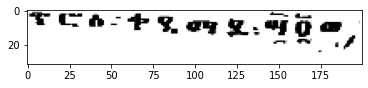

In [50]:
plt.imshow(x_test[1],cmap='Greys_r')

In [152]:
#the index of the image should be indt-1
indt=0
for intg in true:
    indt=indt+1
    encoded_seq = [mapping1[char] for char in intg]
    if indt==99: print(*encoded_seq)

ት   ገ ስ ግ ጽ   በ   ሙ   ነ   ስ መ     ማ ን   ወ ል ጸ   ዘ ተ ስ ብ አ   ወ ተ


In [153]:
indp=0
for intg in pred:
    indp=indp+1
    encoded_seqp = [mapping1[char] for char in intg]
    if indp==99: print(*encoded_seqp)

ት ፡ ን ሰ ግ ድ ስ   ሙ ነ ስ መ   ማ ን   ወ ል ያ   ዘ ተ ስ ብ አ   ወ ት


In [52]:
diff=0
c=0
for(i,j) in zip(true,pred):
    diff=diff+1
    x=editdistance.eval(i,j)
    
    if x>8:
        c=c+1
        print(diff)
        
print(c)

1
2
5
9
14
19
35
38
55
59
68
76
82
84
89
99
100
111
115
118
121
123
127
146
182
183
189
194
197
199
201
209
224
230
235
241
245
248
262
276
282
285
297
299
333
345
354
360
361
372
376
425
435
453
459
460
477
482
512
517
538
543
544
546
553
577
583
584
587
598
608
645
659
681
682
684
705
715
735
736
737
744
754
764
782
783
787
798
800
802
814
816
832
837
846
847
854
855
894
895
904
911
934
947
949
952
967
979
980
981
1015
1021
1031
1039
1062
1064
1066
1084
1092
1103
1104
1122
1129
1133
1145
1158
1165
1171
1199
1212
1216
1218
1236
1238
1245
1247
1269
1271
1273
1298
1301
1306
1313
1324
1328
1330
1331
1334
1365
1396
1398
1420
1426
1443
1448
1460
1471
1473
1475
1479
1488
1497
1498
1501
1514
1522
1526
1528
1545
1547
1553
1559
1568
1573
1574
1575
1580
1581
1633
1643
1650
1664
1665
1699
1702
1705
1719
1735
1747
1763
1766
1775
1783
1784
1835
1844
1864
1867
1894
1909
1910
1926
1938
1947
1948
1956
1968
1975
1988
1990
1996
2002
2013
2015
2019
2038
2039
2043
2047
2063
2066
2067
2070
2071
2079
2105


In [114]:
y_test.shape

(7973, 40)

In [119]:
np.asarray(newy).shape

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(7973,)

In [60]:
for i in range(len(x_test[:3])):
    plt.imsave(f"test_{i:04}.png", x_test[i])